<a href="https://colab.research.google.com/github/Soumyadip0806/Student-s-Exam-Anxiety-Prediction/blob/main/Student's_Exam_Anxiety_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

 # Algorithms -
1. KNeighborsClassifier
2. RandomForestClassifier
3. DecisionTreeClassifier
4. Support Vector Machine
5. Naive Byaes :
      *   Bernoulli Naïve Bayes Classifier
      *   Gaussian Naïve Bayes Classifier
6. Boosting Algorithm :
      *   GradientBoost
      *   LGBM
      *   XGBoost
      *   AdaBoost
7. Multilayer Perceptron (MLP)
8. Deep Neural Network

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [3]:
EA_data = pd.read_csv('Exam_Anxiety.csv')

In [4]:
EA_data.describe()

Q1           Q2           Q3           Q4           Q5  \
count  1133.000000  1133.000000  1133.000000  1133.000000  1133.000000   
mean      1.838482     1.631068     1.285966     1.339806     1.861430   
std       1.352083     1.393380     1.440623     1.413018     1.443654   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000     1.000000   
50%       2.000000     2.000000     1.000000     1.000000     2.000000   
75%       3.000000     3.000000     2.000000     2.000000     3.000000   
max       4.000000     4.000000     4.000000     4.000000     4.000000   

                Q6           Q7           Q8           Q9          Q10  ...  \
count  1133.000000  1133.000000  1133.000000  1133.000000  1133.000000  ...   
mean      1.581642     0.787290     1.409532     1.817299     1.321271  ...   
std       1.511352     1.246102     1.448155     1.382367     1.422639  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     1.000000     0.000000  ...   
50%       1.000000     0.000000     1.000000     2.000000     1.000000  ...   
75%       3.000000     1.000000     2.000000     3.000000     2.000000  ...   
max       4.000000     4.000000     4.000000     4.000000     4.000000  ...   

               Q12          Q13          Q14          Q15          Q16  \
count  1133.000000  1133.000000  1133.000000  1133.000000  1133.000000   
mean      1.501324     1.674316     1.675199     1.963813     1.513680   
std       1.363730     1.487528     1.382779     1.523525     1.459415   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     2.000000     2.000000     2.000000     1.000000   
75%       2.000000     3.000000     3.000000     3.000000     3.000000   
max       4.000000     4.000000     4.000000     4.000000     4.000000   

               Q17          Q18          Q19          Q20       target  
count  1133.000000  1133.000000  1133.000000  1133.000000  1133.000000  
mean      1.371580     1.678729     1.478376     1.816417     0.330980  
std       1.446503     1.399475     1.408179     1.393389     0.470774  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     1.000000     0.000000  
50%       1.000000     2.000000     1.000000     2.000000     0.000000  
75%       2.000000     3.000000     2.000000     3.000000     1.000000  
max       4.000000     4.000000     4.000000     4.000000     1.000000  

[8 rows x 21 columns]

In [5]:
EA_data.head()

age   sex course  Q1  Q2  Q3  Q4  Q5  Q6  Q7  ...  Q12  Q13  Q14  Q15  \
0  21-23  Male   P.G.   4   1   0   2   4   4   0  ...    2    0    4    2   
1  21-23  Male   P.G.   1   2   0   2   1   0   0  ...    1    1    1    1   
2  21-23  Male   P.G.   1   0   0   1   1   0   0  ...    0    0    0    0   
3  21-23  Male   P.G.   0   0   0   0   0   0   0  ...    1    4    4    4   
4  24-26  Male   P.G.   4   3   0   0   0   0   0  ...    0    0    2    0   

   Q16  Q17  Q18  Q19  Q20  target  
0    3    1    4    0    4       1  
1    2    1    1    0    0       0  
2    0    0    0    0    0       0  
3    0    0    1    0    4       0  
4    0    0    1    2    2       0  

[5 rows x 24 columns]

In [6]:
EA_data.tail()

age     sex  course  Q1  Q2  Q3  Q4  Q5  Q6  Q7  ...  Q12  Q13  Q14  \
1128  21-23    Male    P.G.   1   3   4   4   4   2   3  ...    3    3    0   
1129  24-26  Female  Others   4   3   3   0   1   4   4  ...    2    3    0   
1130  21-23  Female  Others   1   4   4   2   3   4   2  ...    1    2    3   
1131  21-23  Female    P.G.   4   3   4   2   2   4   4  ...    2    2    3   
1132  18-20    Male    U.G.   3   4   0   4   1   4   4  ...    2    0    3   

      Q15  Q16  Q17  Q18  Q19  Q20  target  
1128    3    4    1    3    3    4       1  
1129    1    4    2    0    4    1       1  
1130    0    3    1    4    4    2       1  
1131    2    0    2    0    4    4       1  
1132    4    3    4    2    1    0       1  

[5 rows x 24 columns]

In [7]:
#Getting the number of row and column of data
EA_data.shape

(1133, 24)

In [8]:
EA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     1133 non-null   object
 1   sex     1133 non-null   object
 2   course  1133 non-null   object
 3   Q1      1133 non-null   int64 
 4   Q2      1133 non-null   int64 
 5   Q3      1133 non-null   int64 
 6   Q4      1133 non-null   int64 
 7   Q5      1133 non-null   int64 
 8   Q6      1133 non-null   int64 
 9   Q7      1133 non-null   int64 
 10  Q8      1133 non-null   int64 
 11  Q9      1133 non-null   int64 
 12  Q10     1133 non-null   int64 
 13  Q11     1133 non-null   int64 
 14  Q12     1133 non-null   int64 
 15  Q13     1133 non-null   int64 
 16  Q14     1133 non-null   int64 
 17  Q15     1133 non-null   int64 
 18  Q16     1133 non-null   int64 
 19  Q17     1133 non-null   int64 
 20  Q18     1133 non-null   int64 
 21  Q19     1133 non-null   int64 
 22  Q20     1133 non-null   

In [9]:
# checking Missing Values
EA_data.isnull().sum()

age       0
sex       0
course    0
Q1        0
Q2        0
Q3        0
Q4        0
Q5        0
Q6        0
Q7        0
Q8        0
Q9        0
Q10       0
Q11       0
Q12       0
Q13       0
Q14       0
Q15       0
Q16       0
Q17       0
Q18       0
Q19       0
Q20       0
target    0
dtype: int64

In [10]:
# checking the target values distribution
EA_data['target'].value_counts()

0    758
1    375
Name: target, dtype: int64

# Encoding Using LabelEncoder

In [13]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

EA_data['age']= label_encoder.fit_transform(EA_data['age'])
EA_data['sex']= label_encoder.fit_transform(EA_data['sex'])
EA_data['course']= label_encoder.fit_transform(EA_data['course'])

# Plot data in 2D

# Feature Extraction

In [11]:
import seaborn as sns
corrmat = EA_data.corr()
top_corr_features = corrmat.index

# Plot Heat Map

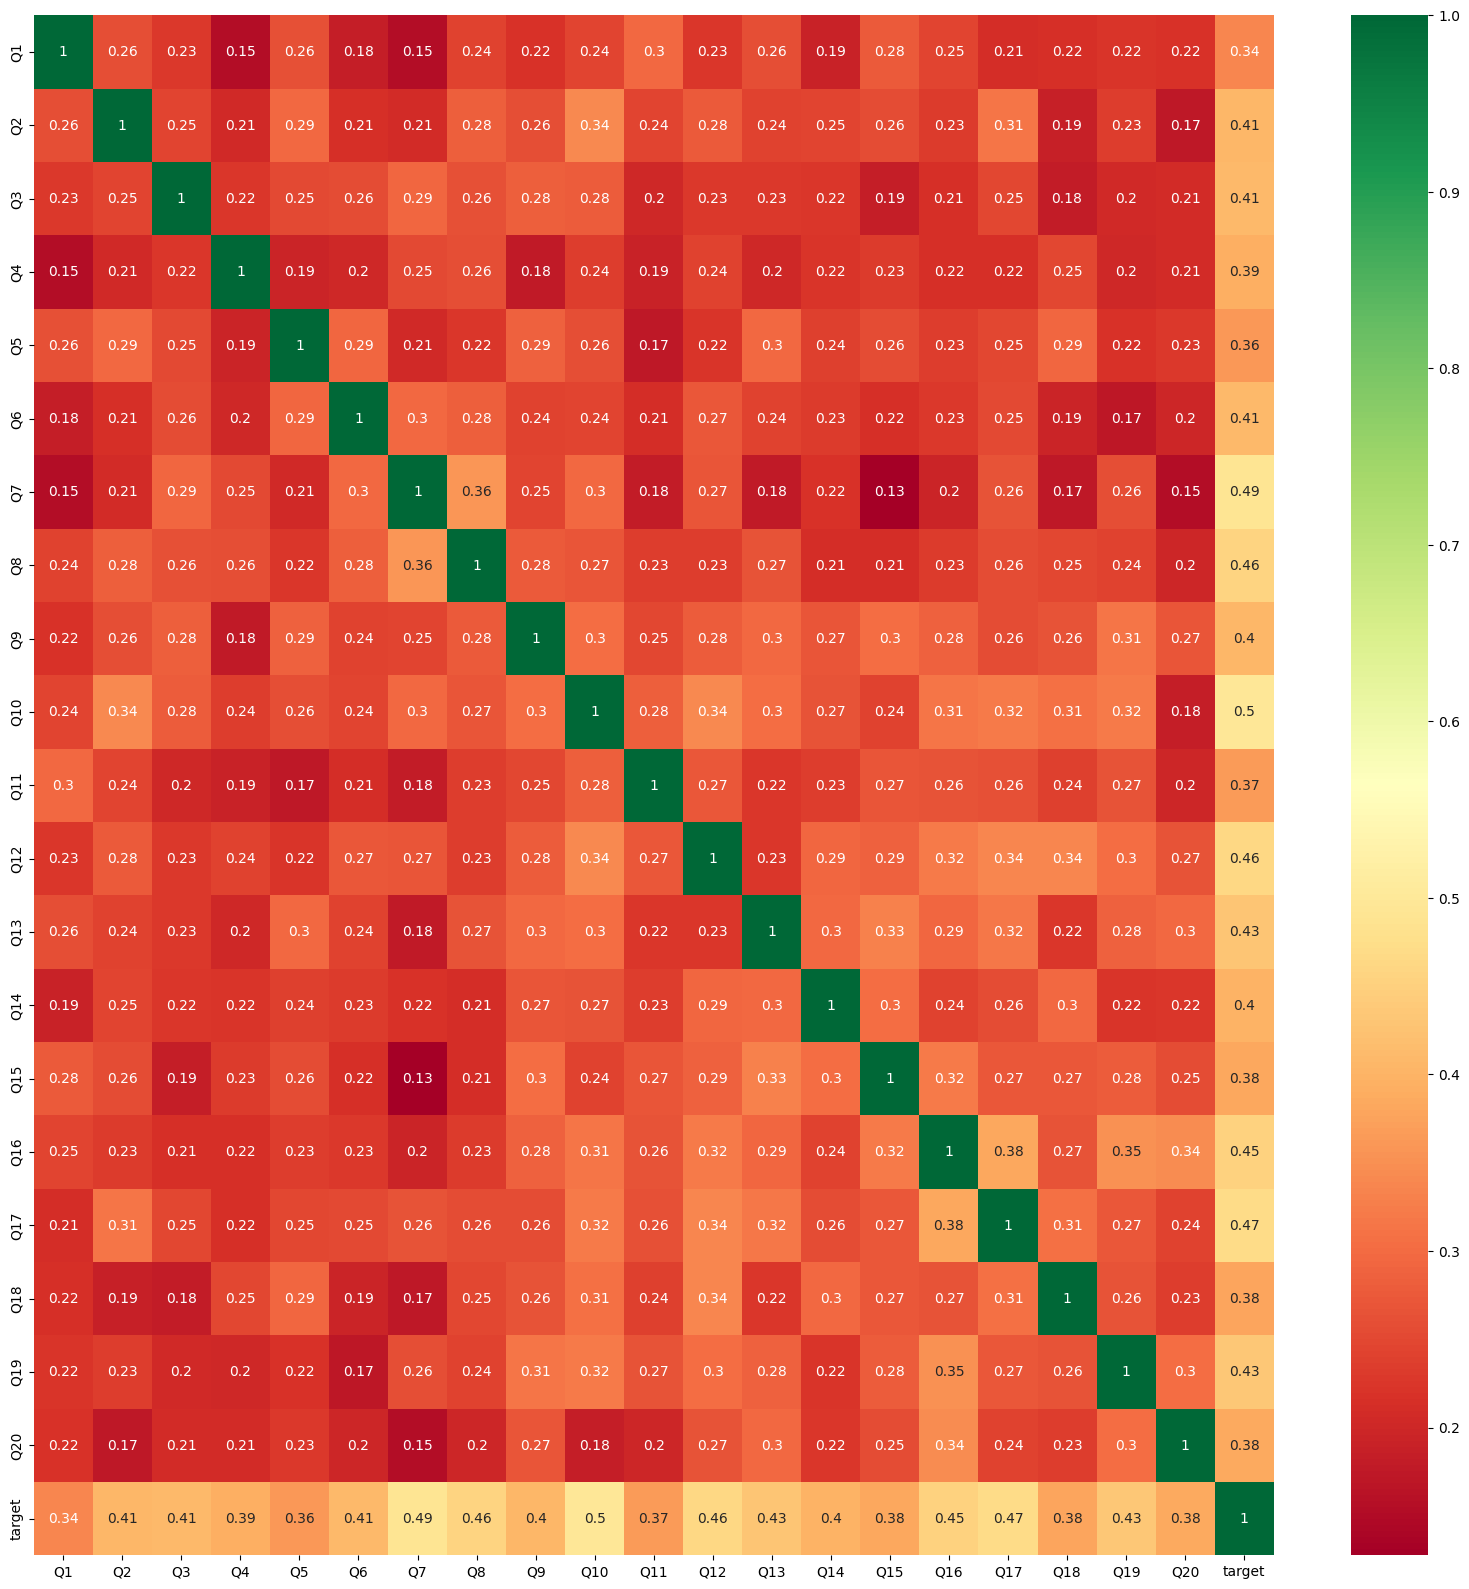

In [12]:
plt.figure(figsize = (20,20))
heat_map = sns.heatmap(EA_data[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

# Histogram

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'course'}>,
        <Axes: title={'center': 'Q1'}>, <Axes: title={'center': 'Q2'}>],
       [<Axes: title={'center': 'Q3'}>, <Axes: title={'center': 'Q4'}>,
        <Axes: title={'center': 'Q5'}>, <Axes: title={'center': 'Q6'}>,
        <Axes: title={'center': 'Q7'}>],
       [<Axes: title={'center': 'Q8'}>, <Axes: title={'center': 'Q9'}>,
        <Axes: title={'center': 'Q10'}>, <Axes: title={'center': 'Q11'}>,
        <Axes: title={'center': 'Q12'}>],
       [<Axes: title={'center': 'Q13'}>, <Axes: title={'center': 'Q14'}>,
        <Axes: title={'center': 'Q15'}>, <Axes: title={'center': 'Q16'}>,
        <Axes: title={'center': 'Q17'}>],
       [<Axes: title={'center': 'Q18'}>, <Axes: title={'center': 'Q19'}>,
        <Axes: title={'center': 'Q20'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

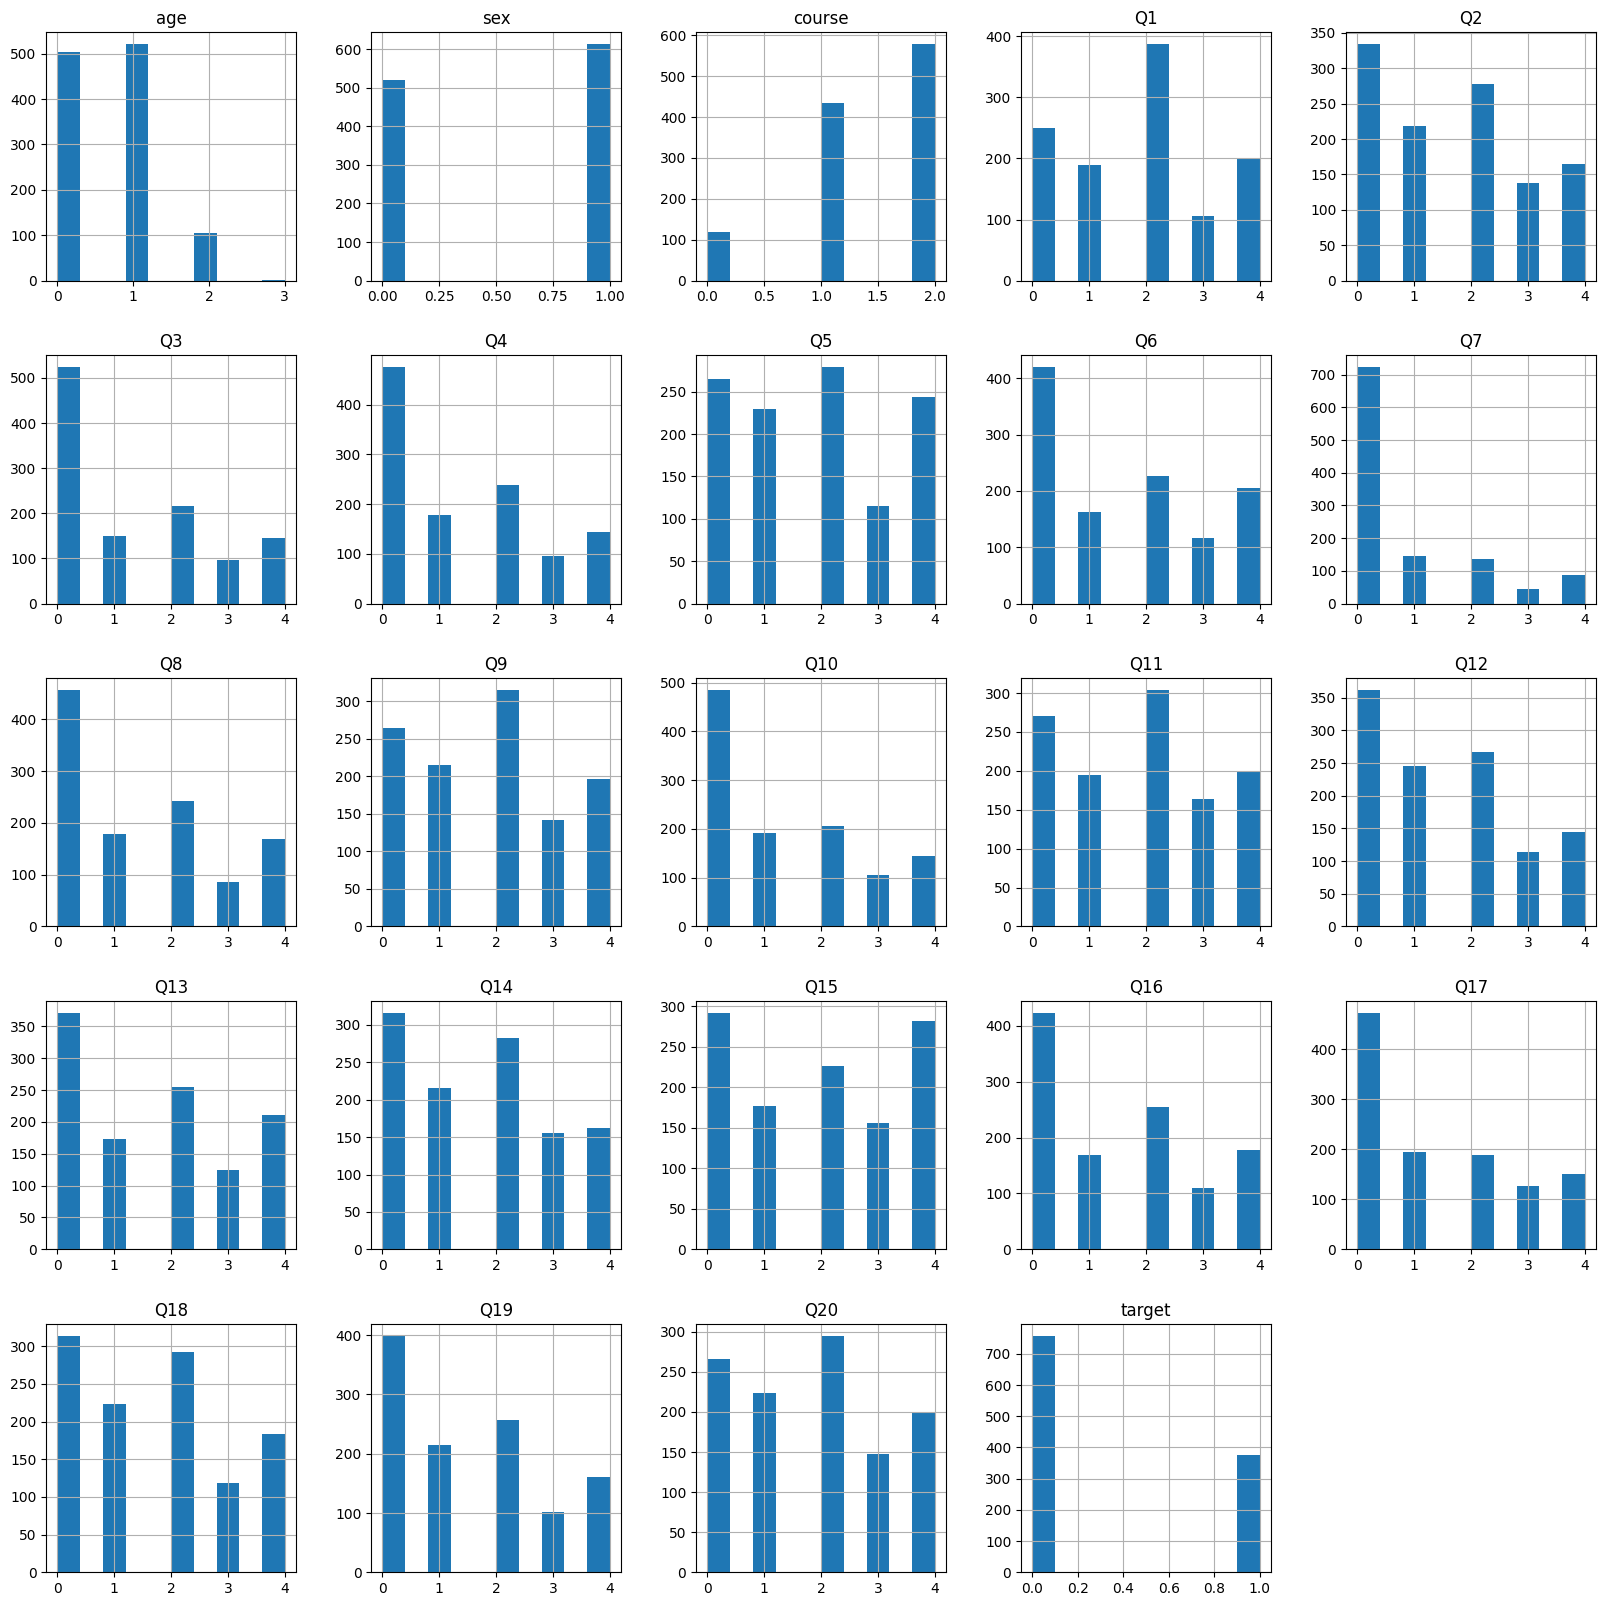

In [14]:
EA_data.hist(figsize=(20,20))

# Target Data size

<Axes: xlabel='target', ylabel='count'>

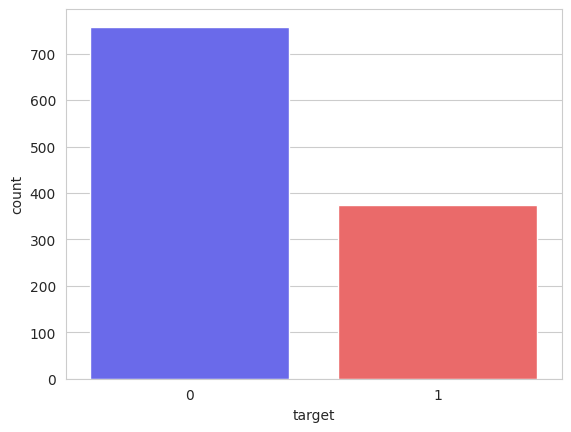

In [15]:
sns.set_style('whitegrid')
sns.countplot(x = 'target', data = EA_data, palette = 'seismic')

# Pair Plot

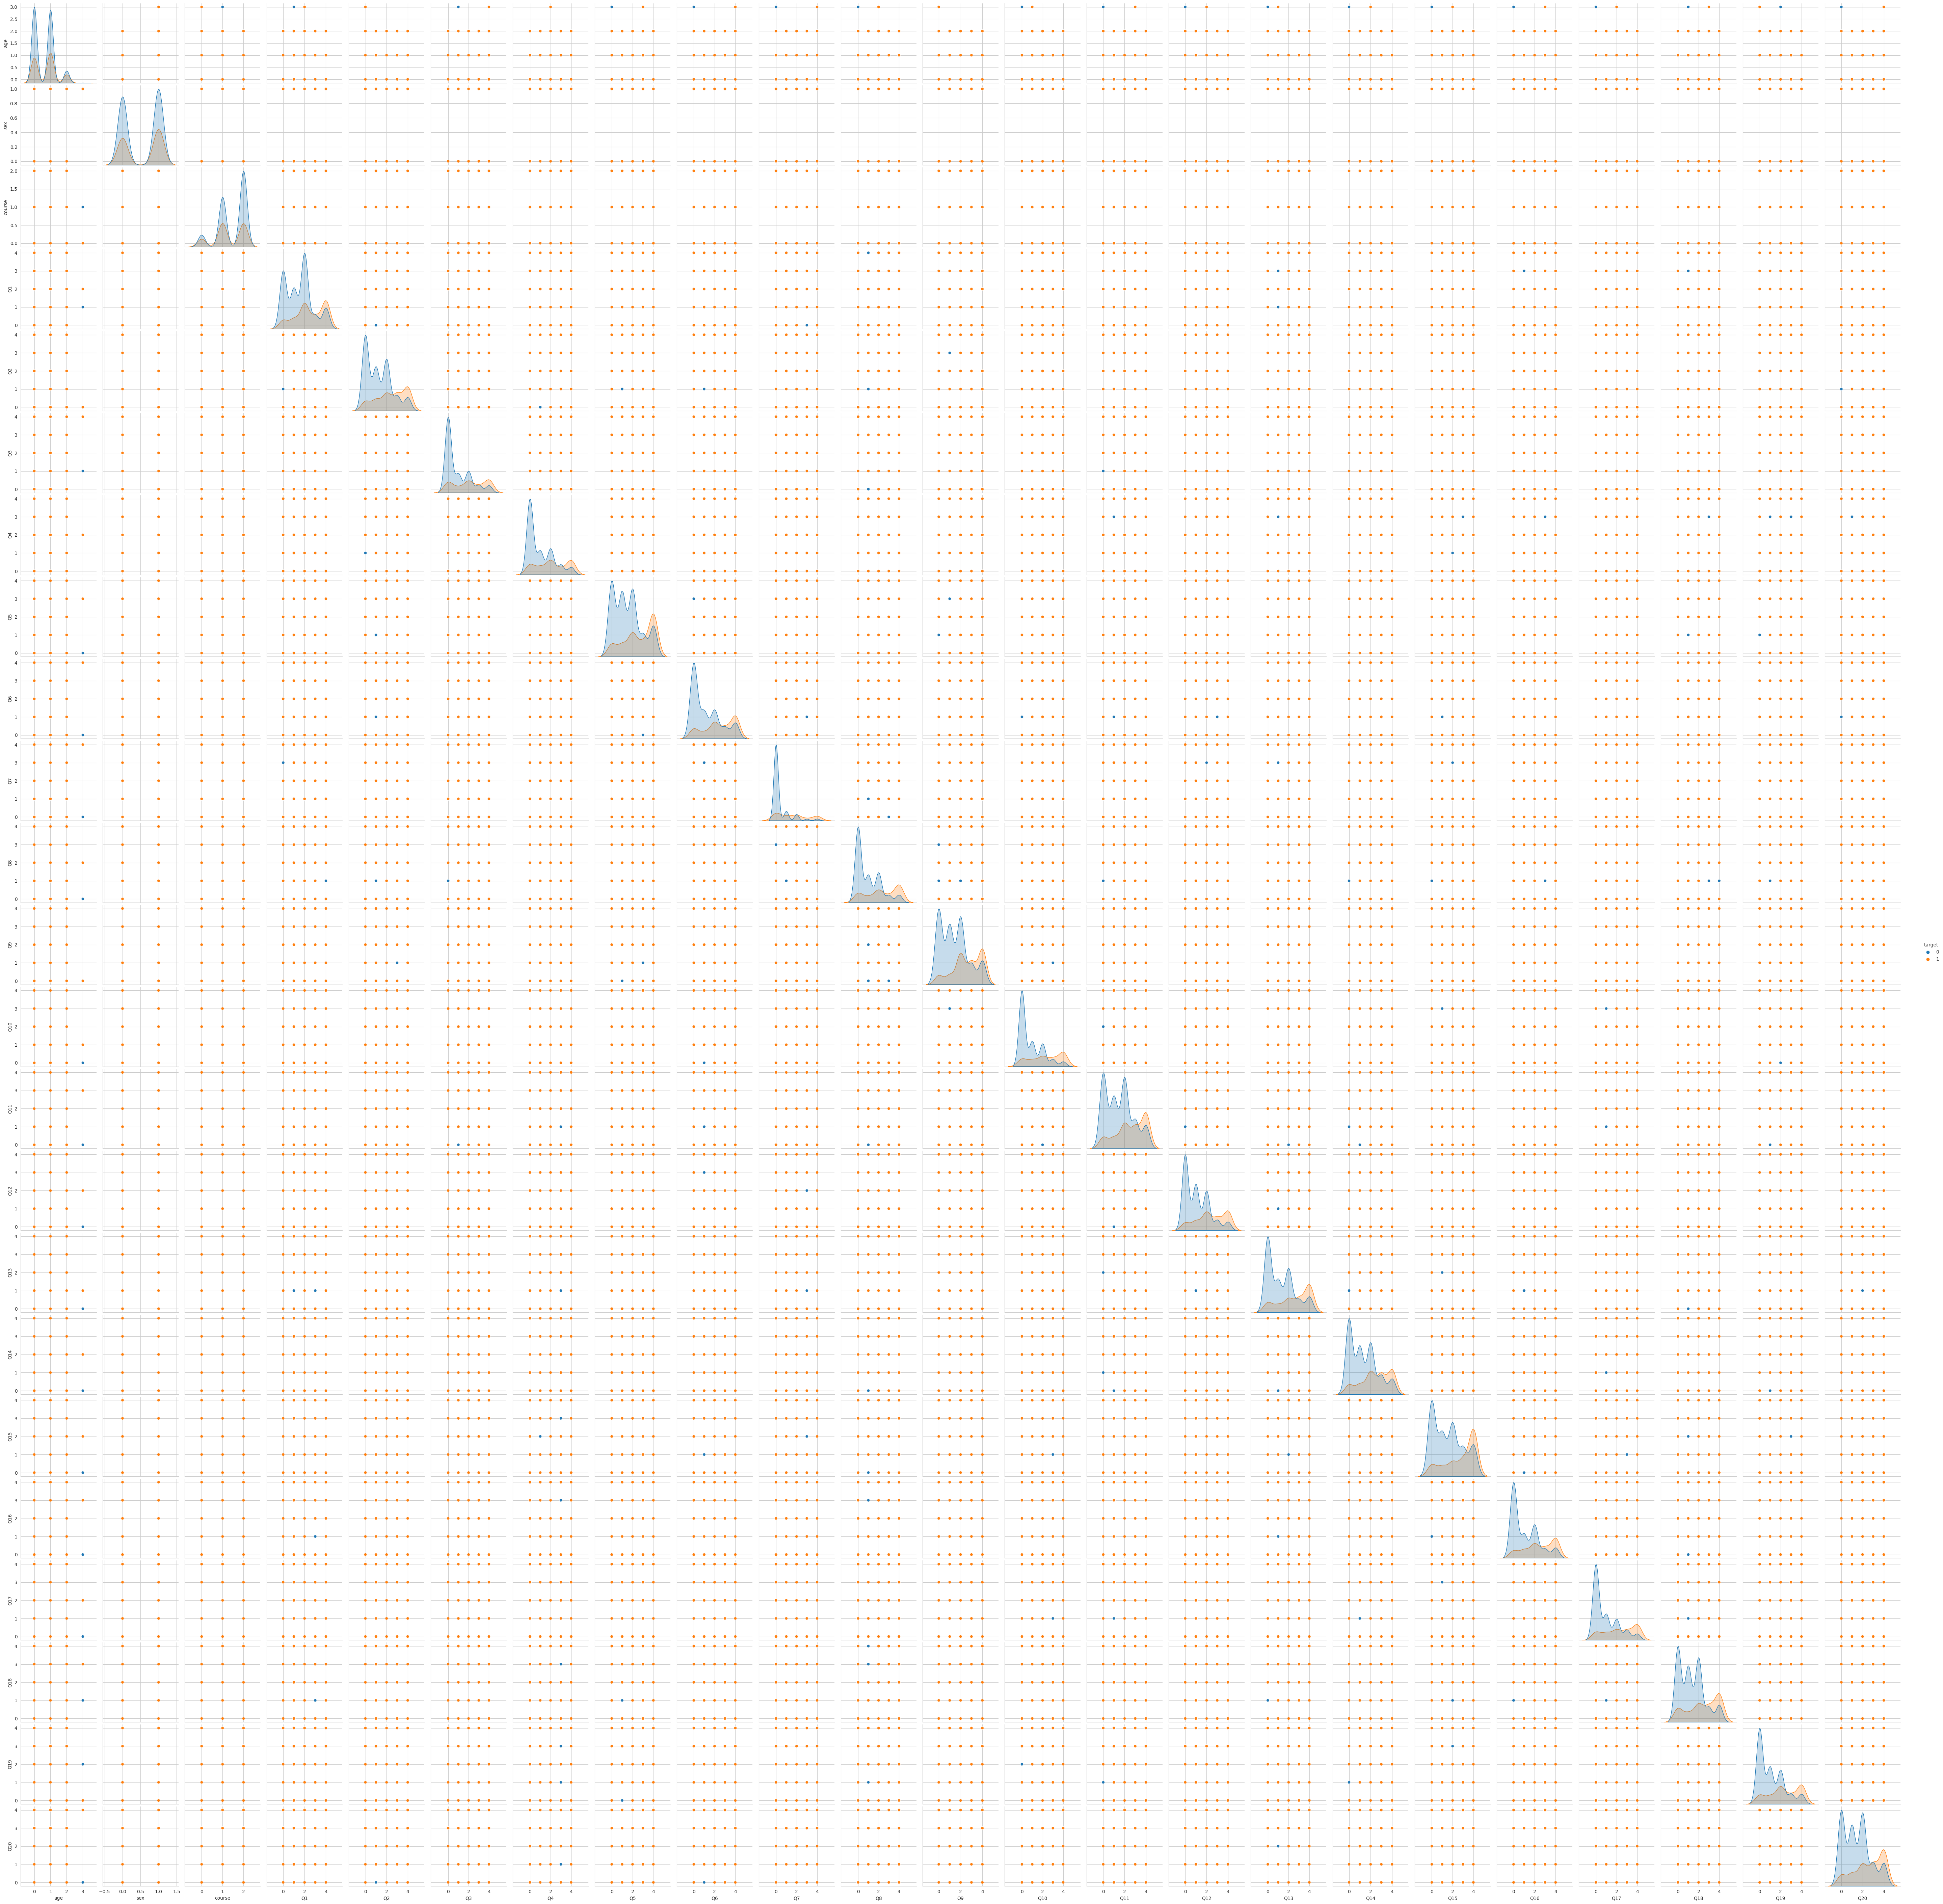

In [16]:
sns.pairplot(EA_data, hue='target')

# Data Processing

In [17]:
EA_dataset = pd.get_dummies(EA_data, columns = ['age','sex','course','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20'])

In [18]:
EA_dataset.head()

target  age_0  age_1  age_2  age_3  sex_0  sex_1  course_0  course_1  \
0       1      0      1      0      0      0      1         0         1   
1       0      0      1      0      0      0      1         0         1   
2       0      0      1      0      0      0      1         0         1   
3       0      0      1      0      0      0      1         0         1   
4       0      0      0      1      0      0      1         0         1   

   course_2  ...  Q19_0  Q19_1  Q19_2  Q19_3  Q19_4  Q20_0  Q20_1  Q20_2  \
0         0  ...      1      0      0      0      0      0      0      0   
1         0  ...      1      0      0      0      0      1      0      0   
2         0  ...      1      0      0      0      0      1      0      0   
3         0  ...      1      0      0      0      0      0      0      0   
4         0  ...      0      0      1      0      0      0      0      1   

   Q20_3  Q20_4  
0      0      1  
1      0      0  
2      0      0  
3      0      1  
4      0      0  

[5 rows x 110 columns]

# Test & Train Split

In [19]:
from sklearn.model_selection import train_test_split
y = EA_dataset['target']
X = EA_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)
print('X_train Shape : ',X_train.shape)
print('Y_train Shape : ',y_train.shape)
print('X_test Shape : ',X_test.shape)
print('Y_test Shape : ',y_test.shape)

X_train Shape :  (906, 109)
Y_train Shape :  (906,)
X_test Shape :  (227, 109)
Y_test Shape :  (227,)


# 1. KNeighborsClassifier

Accuracy :  0.9118942731277533
r2 Score :  0.956953642384106
auc :  0.8835526315789474
LOGLOSS Value is 3.1756522809794845
Mean absolute error :  0.0881
Mean Squared Error :  0.0881
f-Beta Score :  0.8955223880597015 
 

Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       152
           1       0.92      0.80      0.86        75

    accuracy                           0.91       227
   macro avg       0.92      0.88      0.90       227
weighted avg       0.91      0.91      0.91       227
 
 

Confusion Matrix :


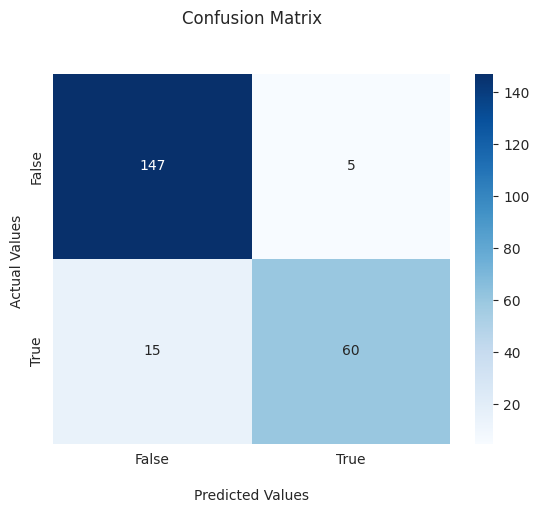



True Positive Rate :  0.9074074074074074
True Negative Rate :  0.9230769230769231
False Positive Rate :  0.07692307692307693
False Negative Rate :  0.2 
 



In [20]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

# Accuracy
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

# r2 score
print('r2 Score : ',knn_classifier.score(X_train,y_train))

# auc
auc = roc_auc_score(y_test, y_pred)
print('auc : ',auc)

# LogLOss Value
print('LOGLOSS Value is',log_loss(y_test, y_pred))


# Mean absolute Error & Mean Square Error
print('Mean absolute error : ',round(metrics.mean_absolute_error(y_test, y_pred), 4))
print('Mean Squared Error : ',round(metrics.mean_squared_error(y_test, y_pred), 4))

# f-beta Score
beta = 0.5
f_beta = fbeta_score(y_test, y_pred, beta=beta)
print("f-Beta Score : ", f_beta,'\n','\n')

# Classification Report
print('Classification Report : ')
print (classification_report(y_test, y_pred),'\n','\n')





# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt="")
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]
print('\n')
print('True Positive Rate : ',(true_positive/(true_positive+false_negative)))
print('True Negative Rate : ',(true_negative/(false_positive+true_negative)))
print('False Positive Rate : ',(false_positive/(false_positive+true_negative)))
print('False Negative Rate : ',(false_negative/(false_negative+true_negative)),'\n','\n')



# 1. KNeighborsClassifier with StratifiedKFold CV

In [21]:
accuracy1=[]
r2_score1=[]
auc1=[]
LOGLOSS_Value1=[]



skf=StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X,y):
  print("Train : ",train_index, "Validation : ",test_index)
  X1_train,X1_test =X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test =y.iloc[train_index],y.iloc[test_index]

  knn_classifier.fit(X1_train, y1_train)
  y1_pred = knn_classifier.predict(X1_test)
  score=accuracy_score(y1_pred,y1_test)
  r2_Score1=knn_classifier.score(X1_train,y1_train)
  auc1 = roc_auc_score(y1_test, y1_pred)
  LogLoss1=log_loss(y1_test, y1_pred)
  accuracy1.append(score)
  r2_score1.append(r2_Score1)
  LOGLOSS_Value1.append(LogLoss1)


print('\n','\n')
print('Accuracy with S_K-fold CV : ',np.array(accuracy1).mean())
print('r2 Score with S_K-fold CV : ',np.array(r2_Score1).mean())
print('LOGLOSS Value with S_K-fold CV',np.array(LOGLOSS_Value1).mean())




Train :  [ 102  103  104 ... 1130 1131 1132] Validation :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 107 118 122 123 126 127
 128 145 146 149 154 160]
Train :  [   0    1    2 ... 1130 1131 1132] Validation :  [102 103 104 105 106 108 109 110 111 112 113 114 115 116 117 119 120 121
 124 125 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 147 148 150 151 152 153 155 156 157 158 159 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 203 204 206 209 212 214 221 222 225 226 233 235
 244 247 251 261 262 263 278 280 285 288 300 301 307 

# 2. Random Forest Classifier

In [22]:
from sklearn.model_selection import train_test_split
y = EA_dataset['target']
X = EA_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)
print('X_train Shape : ',X_train.shape)
print('Y_train Shape : ',y_train.shape)
print('X_test Shape : ',X_test.shape)
print('Y_test Shape : ',y_test.shape)

X_train Shape :  (906, 109)
Y_train Shape :  (906,)
X_test Shape :  (227, 109)
Y_test Shape :  (227,)


Accuracy :  0.9427312775330396
r2 Score :  1.0
auc :  0.930219298245614
LOGLOSS Value is 2.064173982636665
Mean absolute error :  0.0573
Mean Squared Error :  0.0573
f-Beta Score :  0.9228650137741048 
 

Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       152
           1       0.93      0.89      0.91        75

    accuracy                           0.94       227
   macro avg       0.94      0.93      0.93       227
weighted avg       0.94      0.94      0.94       227
 
 

Confusion Matrix :


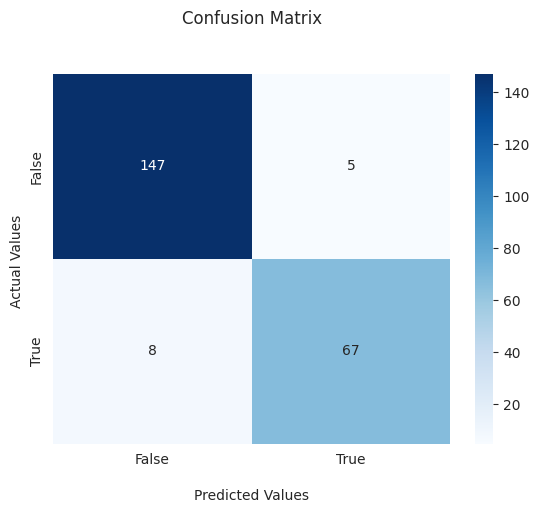



True Positive Rate :  0.9483870967741935
True Negative Rate :  0.9305555555555556
False Positive Rate :  0.06944444444444445
False Negative Rate :  0.10666666666666667 
 



In [23]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=72, random_state=72)
randomforest_classifier.fit(X_train, y_train)
y_pred = randomforest_classifier.predict(X_test)

# Accuracy
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

# r2 score
print('r2 Score : ',randomforest_classifier.score(X_train,y_train))

# auc
auc = roc_auc_score(y_test, y_pred)
print('auc : ',auc)

# LogLOss Value
print('LOGLOSS Value is',log_loss(y_test, y_pred))


# Mean absolute Error & Mean Square Error
print('Mean absolute error : ',round(metrics.mean_absolute_error(y_test, y_pred), 4))
print('Mean Squared Error : ',round(metrics.mean_squared_error(y_test, y_pred), 4))

# f-beta Score
beta = 0.5
f_beta = fbeta_score(y_test, y_pred, beta=beta)
print("f-Beta Score : ", f_beta,'\n','\n')

# Classification Report
print('Classification Report : ')
print (classification_report(y_test, y_pred),'\n','\n')





# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt="")
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]
print('\n')
print('True Positive Rate : ',(true_positive/(true_positive+false_negative)))
print('True Negative Rate : ',(true_negative/(false_positive+true_negative)))
print('False Positive Rate : ',(false_positive/(false_positive+true_negative)))
print('False Negative Rate : ',(false_negative/(false_negative+true_negative)),'\n','\n')

# 2. Random Forest Classifier with StratifiedKFold CV

In [24]:
accuracy1=[]
r2_score1=[]
auc1=[]
LOGLOSS_Value1=[]


skf=StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X,y):
  print("Train : ",train_index, "Validation : ",test_index)
  X1_train,X1_test =X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test =y.iloc[train_index],y.iloc[test_index]



  randomforest_classifier= RandomForestClassifier(n_estimators=72, random_state=72)
  randomforest_classifier.fit(X1_train, y1_train)
  y1_pred = randomforest_classifier.predict(X1_test)
  score=accuracy_score(y1_pred,y1_test)
  r2_Score1=randomforest_classifier.score(X1_train,y1_train)
  auc1 = roc_auc_score(y1_test, y1_pred)
  LogLoss1=log_loss(y1_test, y1_pred)
  accuracy1.append(score)
  r2_score1.append(r2_Score1)
  LOGLOSS_Value1.append(LogLoss1)


print('\n','\n')
print('Accuracy with S_K-fold CV : ',np.array(accuracy1).mean())
print('r2 Score with S_K-fold CV : ',np.array(r2_Score1).mean())
print('LOGLOSS Value with S_K-fold CV',np.array(LOGLOSS_Value1).mean())

Train :  [ 102  103  104 ... 1130 1131 1132] Validation :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 107 118 122 123 126 127
 128 145 146 149 154 160]
Train :  [   0    1    2 ... 1130 1131 1132] Validation :  [102 103 104 105 106 108 109 110 111 112 113 114 115 116 117 119 120 121
 124 125 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 147 148 150 151 152 153 155 156 157 158 159 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 203 204 206 209 212 214 221 222 225 226 233 235
 244 247 251 261 262 263 278 280 285 288 300 301 307 

# 3. Decision Tree

In [26]:
from sklearn.model_selection import train_test_split
y = EA_dataset['target']
X = EA_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

Accuracy :  0.8281938325991189
r2 Score :  0.8818984547461368
auc :  0.7737719298245613
LOGLOSS Value is 6.192521947909996
Mean absolute error :  0.1718
Mean Squared Error :  0.1718
f-Beta Score :  0.7692307692307692 
 

Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       152
           1       0.82      0.61      0.70        75

    accuracy                           0.83       227
   macro avg       0.83      0.77      0.79       227
weighted avg       0.83      0.83      0.82       227
 
 

Confusion Matrix :


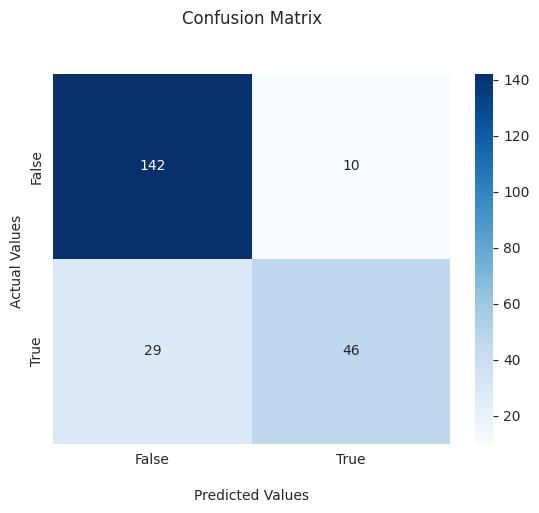



True Positive Rate :  0.8304093567251462
True Negative Rate :  0.8214285714285714
False Positive Rate :  0.17857142857142858
False Negative Rate :  0.38666666666666666 
 



In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy",splitter="random",max_depth=5,random_state=673)
dtree = dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

# Accuracy
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

# r2 score
print('r2 Score : ',dtree.score(X_train,y_train))

# auc
auc = roc_auc_score(y_test, y_pred)
print('auc : ',auc)

# LogLOss Value
print('LOGLOSS Value is',log_loss(y_test, y_pred))


# Mean absolute Error & Mean Square Error
print('Mean absolute error : ',round(metrics.mean_absolute_error(y_test, y_pred), 4))
print('Mean Squared Error : ',round(metrics.mean_squared_error(y_test, y_pred), 4))

# f-beta Score
beta = 0.5
f_beta = fbeta_score(y_test, y_pred, beta=beta)
print("f-Beta Score : ", f_beta,'\n','\n')

# Classification Report
print('Classification Report : ')
print (classification_report(y_test, y_pred),'\n','\n')





# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt="")
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]
print('\n')
print('True Positive Rate : ',(true_positive/(true_positive+false_negative)))
print('True Negative Rate : ',(true_negative/(false_positive+true_negative)))
print('False Positive Rate : ',(false_positive/(false_positive+true_negative)))
print('False Negative Rate : ',(false_negative/(false_negative+true_negative)),'\n','\n')

# 3. Decision Tree Classifier with StratifiedKFold CV

In [28]:
accuracy1=[]
r2_score1=[]
auc1=[]
LOGLOSS_Value1=[]


skf=StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X,y):
  print("Train : ",train_index, "Validation : ",test_index)
  X1_train,X1_test =X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test =y.iloc[train_index],y.iloc[test_index]



  dtree = DecisionTreeClassifier(criterion="entropy",splitter="random",max_depth=5,random_state=673)
  dtree = dtree.fit(X1_train,y1_train)
  y1_pred = dtree.predict(X1_test)
  score=accuracy_score(y1_pred,y1_test)
  r2_Score1=dtree.score(X1_train,y1_train)
  auc1 = roc_auc_score(y1_test, y1_pred)
  LogLoss1=log_loss(y1_test, y1_pred)
  accuracy1.append(score)
  r2_score1.append(r2_Score1)
  LOGLOSS_Value1.append(LogLoss1)


print('\n','\n')
print('Accuracy with S_K-fold CV : ',np.array(accuracy1).mean())
print('r2 Score with S_K-fold CV : ',np.array(r2_Score1).mean())
print('LOGLOSS Value with S_K-fold CV',np.array(LOGLOSS_Value1).mean())

Train :  [ 102  103  104 ... 1130 1131 1132] Validation :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 107 118 122 123 126 127
 128 145 146 149 154 160]
Train :  [   0    1    2 ... 1130 1131 1132] Validation :  [102 103 104 105 106 108 109 110 111 112 113 114 115 116 117 119 120 121
 124 125 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 147 148 150 151 152 153 155 156 157 158 159 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 203 204 206 209 212 214 221 222 225 226 233 235
 244 247 251 261 262 263 278 280 285 288 300 301 307 

# SVM

In [29]:
from sklearn.model_selection import train_test_split
y = EA_dataset['target']
X = EA_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

Accuracy :  0.986784140969163
r2 Score :  0.9966887417218543
auc :  0.9867543859649123
LOGLOSS Value is 0.47634784214692294
Mean absolute error :  0.0132
Mean Squared Error :  0.0132
f-Beta Score :  0.9762532981530344 
 

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       152
           1       0.97      0.99      0.98        75

    accuracy                           0.99       227
   macro avg       0.98      0.99      0.99       227
weighted avg       0.99      0.99      0.99       227
 
 

Confusion Matrix :


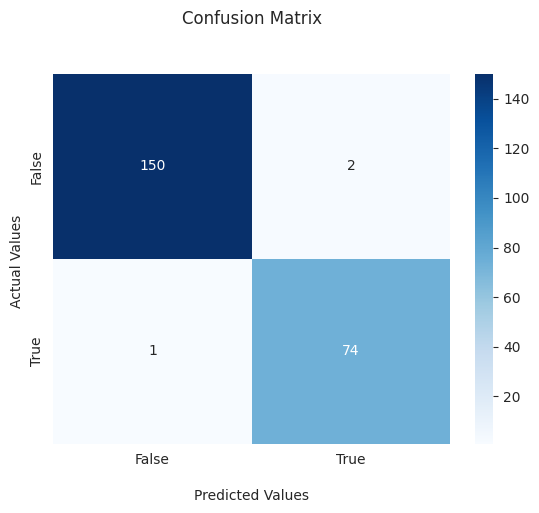



True Positive Rate :  0.9933774834437086
True Negative Rate :  0.9736842105263158
False Positive Rate :  0.02631578947368421
False Negative Rate :  0.013333333333333334 
 



In [30]:
from sklearn import svm
model = svm.SVC(kernel='linear',gamma='auto', random_state=66)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

# r2 score
print('r2 Score : ',model.score(X_train,y_train))

# auc
auc = roc_auc_score(y_test, y_pred)
print('auc : ',auc)

# LogLOss Value
print('LOGLOSS Value is',log_loss(y_test, y_pred))


# Mean absolute Error & Mean Square Error
print('Mean absolute error : ',round(metrics.mean_absolute_error(y_test, y_pred), 4))
print('Mean Squared Error : ',round(metrics.mean_squared_error(y_test, y_pred), 4))

# f-beta Score
beta = 0.5
f_beta = fbeta_score(y_test, y_pred, beta=beta)
print("f-Beta Score : ", f_beta,'\n','\n')

# Classification Report
print('Classification Report : ')
print (classification_report(y_test, y_pred),'\n','\n')





# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt="")
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]
print('\n')
print('True Positive Rate : ',(true_positive/(true_positive+false_negative)))
print('True Negative Rate : ',(true_negative/(false_positive+true_negative)))
print('False Positive Rate : ',(false_positive/(false_positive+true_negative)))
print('False Negative Rate : ',(false_negative/(false_negative+true_negative)),'\n','\n')

# 4. SVM Classifier with StratifiedKFold CV

In [31]:
accuracy1=[]
r2_score1=[]
auc1=[]
LOGLOSS_Value1=[]


skf=StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X,y):
  print("Train : ",train_index, "Validation : ",test_index)
  X1_train,X1_test =X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test =y.iloc[train_index],y.iloc[test_index]



  model = svm.SVC(kernel='linear',gamma='auto', random_state=66)
  model.fit(X1_train, y1_train)
  y1_pred = model.predict(X1_test)
  score=accuracy_score(y1_pred,y1_test)
  r2_Score1=model.score(X1_train,y1_train)
  auc1 = roc_auc_score(y1_test, y1_pred)
  LogLoss1=log_loss(y1_test, y1_pred)
  accuracy1.append(score)
  r2_score1.append(r2_Score1)
  LOGLOSS_Value1.append(LogLoss1)


print('\n','\n')
print('Accuracy with S_K-fold CV : ',np.array(accuracy1).mean())
print('r2 Score with S_K-fold CV : ',np.array(r2_Score1).mean())
print('LOGLOSS Value with S_K-fold CV',np.array(LOGLOSS_Value1).mean())

Train :  [ 102  103  104 ... 1130 1131 1132] Validation :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 107 118 122 123 126 127
 128 145 146 149 154 160]
Train :  [   0    1    2 ... 1130 1131 1132] Validation :  [102 103 104 105 106 108 109 110 111 112 113 114 115 116 117 119 120 121
 124 125 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 147 148 150 151 152 153 155 156 157 158 159 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 203 204 206 209 212 214 221 222 225 226 233 235
 244 247 251 261 262 263 278 280 285 288 300 301 307 

# Naive Bayes

###1. GaussianNB - Naive Bayes classifier for Guassian model.
###2. BernoulliNB - Naive Bayes classifier for multivariate Bernoulli models.

# GaussianNB

In [32]:
from sklearn.model_selection import train_test_split
y = EA_dataset['target']
X = EA_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

Accuracy :  0.9515418502202643
r2 Score :  0.9558498896247241
auc :  0.957061403508772
LOGLOSS Value is 1.7466087545387166
Mean absolute error :  0.0485
Mean Squared Error :  0.0485
f-Beta Score :  0.9057071960297767 
 

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       152
           1       0.89      0.97      0.93        75

    accuracy                           0.95       227
   macro avg       0.94      0.96      0.95       227
weighted avg       0.95      0.95      0.95       227
 
 

Confusion Matrix :


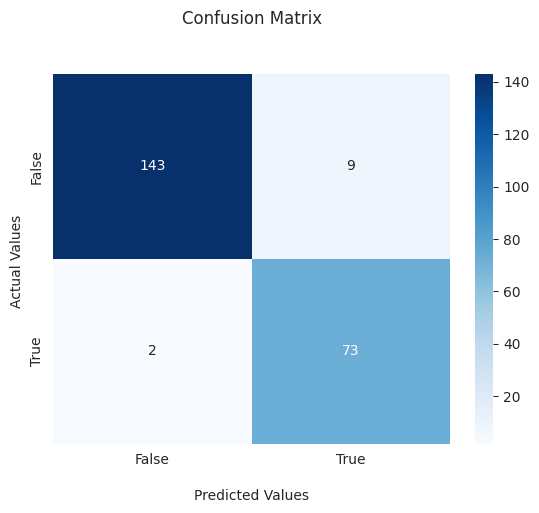



True Positive Rate :  0.9862068965517241
True Positive Rate :  0.8902439024390244
False Positive Rate :  0.10975609756097561
False Negative Rate :  0.02666666666666667 
 



In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None, var_smoothing=1e-0001)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Accuracy
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

# r2 score
print('r2 Score : ',gnb.score(X_train,y_train))

# auc
auc = roc_auc_score(y_test, y_pred)
print('auc : ',auc)

# LogLOss Value
print('LOGLOSS Value is',log_loss(y_test, y_pred))

# Mean absolute Error & Mean Square Error
print('Mean absolute error : ',round(metrics.mean_absolute_error(y_test, y_pred), 4))
print('Mean Squared Error : ',round(metrics.mean_squared_error(y_test, y_pred), 4))

# f-beta Score
beta = 0.5
f_beta = fbeta_score(y_test, y_pred, beta=beta)
print("f-Beta Score : ", f_beta,'\n','\n')

# Classification Report
print('Classification Report : ')
print (classification_report(y_test, y_pred),'\n','\n')

# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt="")
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]
print('\n')
print('True Positive Rate : ',(true_positive/(true_positive+false_negative)))
print('True Positive Rate : ',(true_negative/(false_positive+true_negative)))
print('False Positive Rate : ',(false_positive/(false_positive+true_negative)))
print('False Negative Rate : ',(false_negative/(false_negative+true_negative)),'\n','\n')

# 4. GaussianNB with StratifiedKFold CV

In [35]:
accuracy1=[]
r2_score1=[]
auc1=[]
LOGLOSS_Value1=[]


skf=StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X,y):
  print("Train : ",train_index, "Validation : ",test_index)
  X1_train,X1_test =X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test =y.iloc[train_index],y.iloc[test_index]



  gnb = GaussianNB(priors=None, var_smoothing=1e-0001)
  gnb.fit(X1_train, y1_train)
  y1_pred = gnb.predict(X1_test)
  score=accuracy_score(y1_pred,y1_test)
  r2_Score1=gnb.score(X1_train,y1_train)
  auc1 = roc_auc_score(y1_test, y1_pred)
  LogLoss1=log_loss(y1_test, y1_pred)
  accuracy1.append(score)
  r2_score1.append(r2_Score1)
  LOGLOSS_Value1.append(LogLoss1)


print('\n','\n')
print('Accuracy with S_K-fold CV : ',np.array(accuracy1).mean())
print('r2 Score with S_K-fold CV : ',np.array(r2_Score1).mean())
print('LOGLOSS Value with S_K-fold CV',np.array(LOGLOSS_Value1).mean())

Train :  [ 102  103  104 ... 1130 1131 1132] Validation :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 107 118 122 123 126 127
 128 145 146 149 154 160]
Train :  [   0    1    2 ... 1130 1131 1132] Validation :  [102 103 104 105 106 108 109 110 111 112 113 114 115 116 117 119 120 121
 124 125 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 147 148 150 151 152 153 155 156 157 158 159 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 203 204 206 209 212 214 221 222 225 226 233 235
 244 247 251 261 262 263 278 280 285 288 300 301 307 

# BernoulliNB

In [36]:
from sklearn.model_selection import train_test_split
y = EA_dataset['target']
X = EA_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

Accuracy :  0.960352422907489
r2 Score :  0.9525386313465783
auc :  0.9703947368421052
LOGLOSS Value is 1.4290435264407682
Mean absolute error :  0.0396
Mean Squared Error :  0.0396
f-Beta Score :  0.9124087591240876 
 

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       152
           1       0.89      1.00      0.94        75

    accuracy                           0.96       227
   macro avg       0.95      0.97      0.96       227
weighted avg       0.96      0.96      0.96       227
 
 

Confusion Matrix :


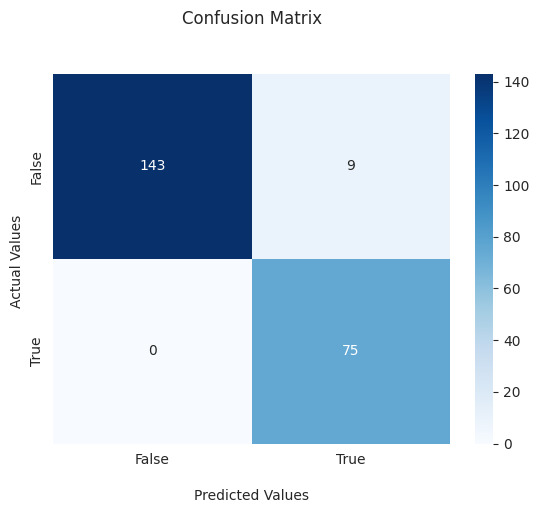



True Positive Rate :  1.0
True Negative Rate :  0.8928571428571429
False Positive Rate :  0.10714285714285714
False Negative Rate :  0.0 
 



In [37]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

# Accuracy
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

# r2 score
print('r2 Score : ',bnb.score(X_train,y_train))

# auc
auc = roc_auc_score(y_test, y_pred)
print('auc : ',auc)

# LogLOss Value
print('LOGLOSS Value is',log_loss(y_test, y_pred))

# Mean absolute Error & Mean Square Error
print('Mean absolute error : ',round(metrics.mean_absolute_error(y_test, y_pred), 4))
print('Mean Squared Error : ',round(metrics.mean_squared_error(y_test, y_pred), 4))

# f-beta Score
beta = 0.5
f_beta = fbeta_score(y_test, y_pred, beta=beta)
print("f-Beta Score : ", f_beta,'\n','\n')

# Classification Report
print('Classification Report : ')
print (classification_report(y_test, y_pred),'\n','\n')

# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt="")
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]
print('\n')
print('True Positive Rate : ',(true_positive/(true_positive+false_negative)))
print('True Negative Rate : ',(true_negative/(false_positive+true_negative)))
print('False Positive Rate : ',(false_positive/(false_positive+true_negative)))
print('False Negative Rate : ',(false_negative/(false_negative+true_negative)),'\n','\n')


# 4. BernoulliNB with StratifiedKFold CV

In [38]:
accuracy1=[]
r2_score1=[]
auc1=[]
LOGLOSS_Value1=[]


skf=StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X,y):
  print("Train : ",train_index, "Validation : ",test_index)
  X1_train,X1_test =X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test =y.iloc[train_index],y.iloc[test_index]



  bnb = BernoulliNB()
  bnb.fit(X1_train, y1_train)
  y1_pred = bnb.predict(X1_test)
  score=accuracy_score(y1_pred,y1_test)
  r2_Score1=bnb.score(X1_train,y1_train)
  auc1 = roc_auc_score(y1_test, y1_pred)
  LogLoss1=log_loss(y1_test, y1_pred)
  accuracy1.append(score)
  r2_score1.append(r2_Score1)
  LOGLOSS_Value1.append(LogLoss1)


print('\n','\n')
print('Accuracy with S_K-fold CV : ',np.array(accuracy1).mean())
print('r2 Score with S_K-fold CV : ',np.array(r2_Score1).mean())
print('LOGLOSS Value with S_K-fold CV',np.array(LOGLOSS_Value1).mean())

Train :  [ 102  103  104 ... 1130 1131 1132] Validation :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 107 118 122 123 126 127
 128 145 146 149 154 160]
Train :  [   0    1    2 ... 1130 1131 1132] Validation :  [102 103 104 105 106 108 109 110 111 112 113 114 115 116 117 119 120 121
 124 125 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 147 148 150 151 152 153 155 156 157 158 159 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 203 204 206 209 212 214 221 222 225 226 233 235
 244 247 251 261 262 263 278 280 285 288 300 301 307 

# BOOSTING ALGORITHM - GradientBoost, XGBoost, AdaBoost

# GradientBoost

In [39]:
from sklearn.model_selection import train_test_split
y = EA_dataset['target']
X =EA_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

Accuracy :  0.9118942731277533
r2 Score :  0.977924944812362
auc :  0.8936842105263157
LOGLOSS Value is 3.1756522809794845
Mean absolute error :  0.0881
Mean Squared Error :  0.0881
f-Beta Score :  0.8774373259052926 
 

Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       152
           1       0.89      0.84      0.86        75

    accuracy                           0.91       227
   macro avg       0.91      0.89      0.90       227
weighted avg       0.91      0.91      0.91       227
 
 

Confusion Matrix :


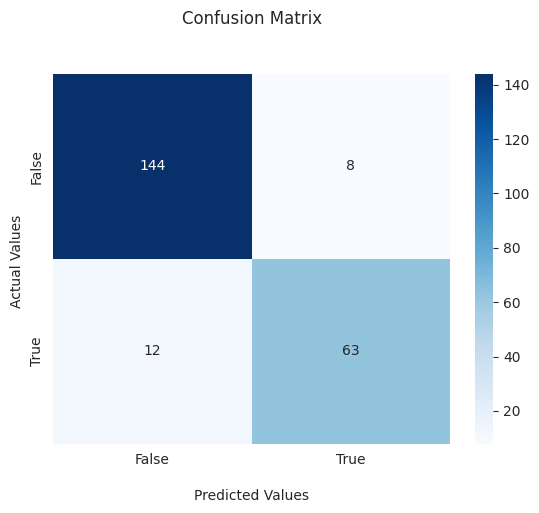



True Positive Rate :  0.9230769230769231
True Negative Rate :  0.8873239436619719
False Positive Rate :  0.11267605633802817
False Negative Rate :  0.16 
 



In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.05, n_estimators=72,random_state=10)
gradient_booster.fit(X_train,y_train)
y_pred = gradient_booster.predict(X_test)

# Accuracy
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

# r2 score
print('r2 Score : ',gradient_booster.score(X_train,y_train))

# auc
auc = roc_auc_score(y_test, y_pred)
print('auc : ',auc)

# LogLOss Value
print('LOGLOSS Value is',log_loss(y_test, y_pred))

# Mean absolute Error & Mean Square Error
print('Mean absolute error : ',round(metrics.mean_absolute_error(y_test, y_pred), 4))
print('Mean Squared Error : ',round(metrics.mean_squared_error(y_test, y_pred), 4))

# f-beta Score
beta = 0.5
f_beta = fbeta_score(y_test, y_pred, beta=beta)
print("f-Beta Score : ", f_beta,'\n','\n')

# Classification Report
print('Classification Report : ')
print (classification_report(y_test, y_pred),'\n','\n')

# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt="")
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]
print('\n')
print('True Positive Rate : ',(true_positive/(true_positive+false_negative)))
print('True Negative Rate : ',(true_negative/(false_positive+true_negative)))
print('False Positive Rate : ',(false_positive/(false_positive+true_negative)))
print('False Negative Rate : ',(false_negative/(false_negative+true_negative)),'\n','\n')

#GradientBoost with StratifiedKFold CV

In [41]:
accuracy1=[]
r2_score1=[]
auc1=[]
LOGLOSS_Value1=[]


skf=StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X,y):
  print("Train : ",train_index, "Validation : ",test_index)
  X1_train,X1_test =X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test =y.iloc[train_index],y.iloc[test_index]



  gradient_booster = GradientBoostingClassifier(learning_rate=0.05, n_estimators=72,random_state=10)
  gradient_booster.fit(X1_train,y1_train)
  y1_pred = gradient_booster.predict(X1_test)
  score=accuracy_score(y1_pred,y1_test)
  r2_Score1=gradient_booster.score(X1_train,y1_train)
  auc1 = roc_auc_score(y1_test, y1_pred)
  LogLoss1=log_loss(y1_test, y1_pred)
  accuracy1.append(score)
  r2_score1.append(r2_Score1)
  LOGLOSS_Value1.append(LogLoss1)


print('\n','\n')
print('Accuracy with S_K-fold CV : ',np.array(accuracy1).mean())
print('r2 Score with S_K-fold CV : ',np.array(r2_Score1).mean())
print('LOGLOSS Value with S_K-fold CV',np.array(LOGLOSS_Value1).mean())

Train :  [ 102  103  104 ... 1130 1131 1132] Validation :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 107 118 122 123 126 127
 128 145 146 149 154 160]
Train :  [   0    1    2 ... 1130 1131 1132] Validation :  [102 103 104 105 106 108 109 110 111 112 113 114 115 116 117 119 120 121
 124 125 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 147 148 150 151 152 153 155 156 157 158 159 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 203 204 206 209 212 214 221 222 225 226 233 235
 244 247 251 261 262 263 278 280 285 288 300 301 307 

# XGBClassifier

In [42]:
from sklearn.model_selection import train_test_split
y = EA_dataset['target']
X = EA_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

Accuracy :  0.9427312775330396
r2 Score :  1.0
auc :  0.9403508771929825
LOGLOSS Value is 2.064173982636665
Mean absolute error :  0.0573
Mean Squared Error :  0.0573
f-Beta Score :  0.9043927648578811 
 

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       152
           1       0.90      0.93      0.92        75

    accuracy                           0.94       227
   macro avg       0.93      0.94      0.94       227
weighted avg       0.94      0.94      0.94       227
 
 

Confusion Matrix :


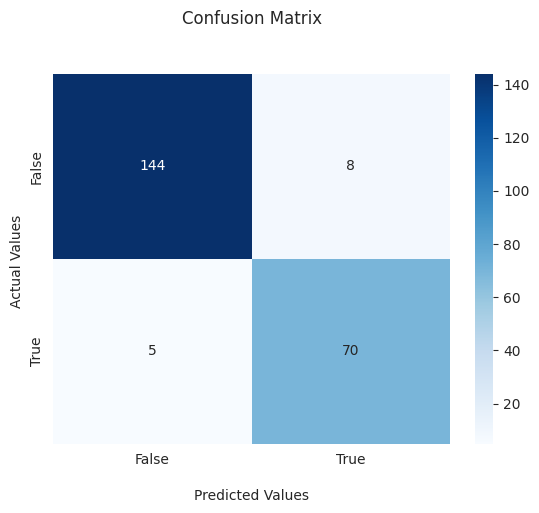



True Positive Rate :  0.9664429530201343
True Negative Rate :  0.8974358974358975
False Positive Rate :  0.10256410256410256
False Negative Rate :  0.06666666666666667 
 



In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

# Accuracy
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

# r2 score
print('r2 Score : ',xgb.score(X_train,y_train))

# auc
auc = roc_auc_score(y_test, y_pred)
print('auc : ',auc)

# LogLOss Value
print('LOGLOSS Value is',log_loss(y_test, y_pred))

# Mean absolute Error & Mean Square Error
print('Mean absolute error : ',round(metrics.mean_absolute_error(y_test, y_pred), 4))
print('Mean Squared Error : ',round(metrics.mean_squared_error(y_test, y_pred), 4))

# f-beta Score
beta = 0.5
f_beta = fbeta_score(y_test, y_pred, beta=beta)
print("f-Beta Score : ", f_beta,'\n','\n')

# Classification Report
print('Classification Report : ')
print (classification_report(y_test, y_pred),'\n','\n')

# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt="")
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]
print('\n')
print('True Positive Rate : ',(true_positive/(true_positive+false_negative)))
print('True Negative Rate : ',(true_negative/(false_positive+true_negative)))
print('False Positive Rate : ',(false_positive/(false_positive+true_negative)))
print('False Negative Rate : ',(false_negative/(false_negative+true_negative)),'\n','\n')

# XGBClassifier with StratifiedKFold CV

In [45]:
accuracy1=[]
r2_score1=[]
auc1=[]
LOGLOSS_Value1=[]


skf=StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X,y):
  print("Train : ",train_index, "Validation : ",test_index)
  X1_train,X1_test =X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test =y.iloc[train_index],y.iloc[test_index]



  xgb = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
  xgb.fit(X1_train,y1_train)
  y1_pred = xgb.predict(X1_test)
  score=accuracy_score(y1_pred,y1_test)
  r2_Score1=xgb.score(X1_train,y1_train)
  auc1 = roc_auc_score(y1_test, y1_pred)
  LogLoss1=log_loss(y1_test, y1_pred)
  accuracy1.append(score)
  r2_score1.append(r2_Score1)
  LOGLOSS_Value1.append(LogLoss1)


print('\n','\n')
print('Accuracy with S_K-fold CV : ',np.array(accuracy1).mean())
print('r2 Score with S_K-fold CV : ',np.array(r2_Score1).mean())
print('LOGLOSS Value with S_K-fold CV',np.array(LOGLOSS_Value1).mean())

Train :  [ 102  103  104 ... 1130 1131 1132] Validation :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 107 118 122 123 126 127
 128 145 146 149 154 160]
Train :  [   0    1    2 ... 1130 1131 1132] Validation :  [102 103 104 105 106 108 109 110 111 112 113 114 115 116 117 119 120 121
 124 125 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 147 148 150 151 152 153 155 156 157 158 159 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 203 204 206 209 212 214 221 222 225 226 233 235
 244 247 251 261 262 263 278 280 285 288 300 301 307 

#AdaBoosting using gaussianNB

In [46]:
from sklearn.model_selection import train_test_split
y = EA_dataset['target']
X = EA_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

<Axes: >

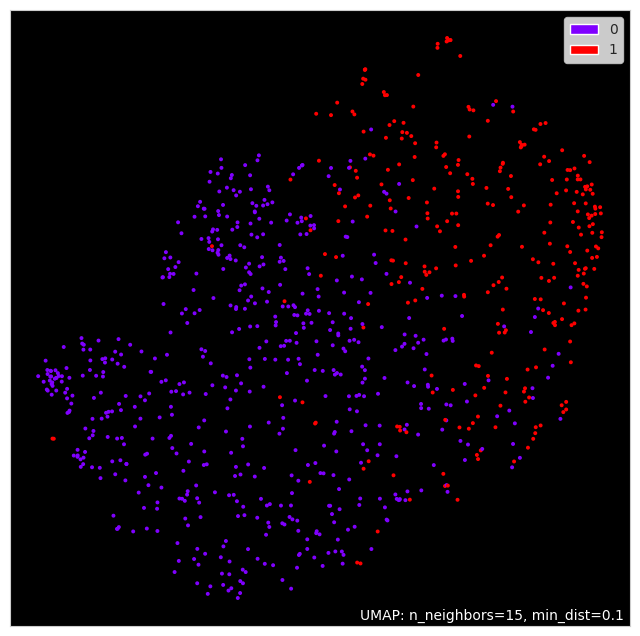

In [52]:
import umap
import umap.plot
mapper = umap.UMAP().fit(X_train)
umap.plot.points(mapper, labels=y_train,theme='fire')


In [53]:
from umap import UMAP
import plotly.express as px

umap_3d = UMAP(n_components=3, init='random', random_state=0)
x_umap = umap_3d.fit_transform(X_train)
umap_df = pd.DataFrame(x_umap)
train_y_sr = pd.Series(y_train,name='ExamAnxiety')
new_df = pd.concat([umap_df,train_y_sr],axis=1)
fig = px.scatter_3d(
    new_df, x=0, y=1, z=2,
    color='ExamAnxiety', labels={'color': 'number'}
)
fig.update_traces(marker_size=1.5)
fig.show()

Accuracy :  0.9515418502202643
r2 Score :  0.9977924944812362
auc :  0.9469298245614034
LOGLOSS Value is 1.7466087545387166
Mean absolute error :  0.0485
Mean Squared Error :  0.0485
f-Beta Score :  0.9234828496042214 
 

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       152
           1       0.92      0.93      0.93        75

    accuracy                           0.95       227
   macro avg       0.94      0.95      0.95       227
weighted avg       0.95      0.95      0.95       227
 
 

Confusion Matrix :


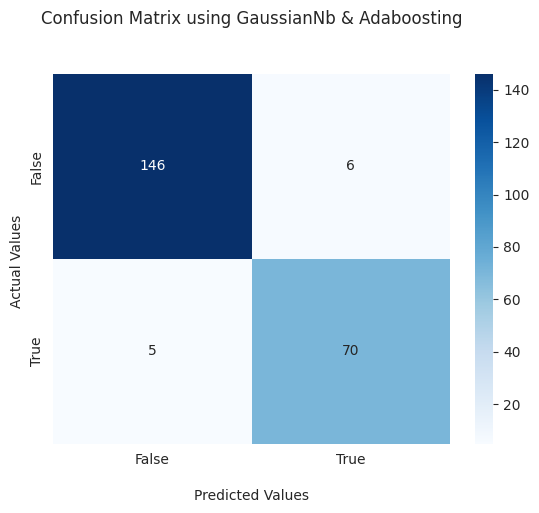



True Positive Rate :  0.9668874172185431
True Negative Rate :  0.9210526315789473
False Positive Rate :  0.07894736842105263
False Negative Rate :  0.06666666666666667 
 



In [54]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-0001),
                         n_estimators=900,learning_rate=0.05, algorithm='SAMME.R',random_state=100)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

# predict probabilities
pred_prob1 = ada.predict_proba(X_test)

# Accuracy
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

# r2 score
print('r2 Score : ',ada.score(X_train,y_train))

# auc
auc = roc_auc_score(y_test, y_pred)
print('auc : ',auc)

# LogLOss Value
print('LOGLOSS Value is',log_loss(y_test, y_pred))

# Mean absolute Error & Mean Square Error
print('Mean absolute error : ',round(metrics.mean_absolute_error(y_test, y_pred), 4))
print('Mean Squared Error : ',round(metrics.mean_squared_error(y_test, y_pred), 4))

# f-beta Score
beta = 0.5
f_beta = fbeta_score(y_test, y_pred, beta=beta)
print("f-Beta Score : ", f_beta,'\n','\n')

# Classification Report
print('Classification Report : ')
print (classification_report(y_test, y_pred),'\n','\n')

# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt="")
ax.set_title('Confusion Matrix using GaussianNb & Adaboosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]
print('\n')
print('True Positive Rate : ',(true_positive/(true_positive+false_negative)))
print('True Negative Rate : ',(true_negative/(false_positive+true_negative)))
print('False Positive Rate : ',(false_positive/(false_positive+true_negative)))
print('False Negative Rate : ',(false_negative/(false_negative+true_negative)),'\n','\n')

Confusion Matrix :


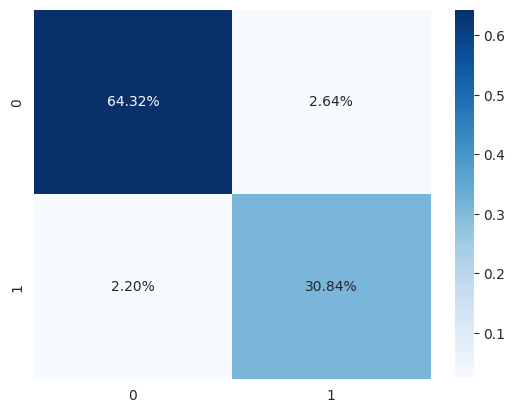

In [55]:
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
sns.heatmap(cm/np.sum(cm),annot=True, fmt=".2%",cmap='Blues')
plt.show()

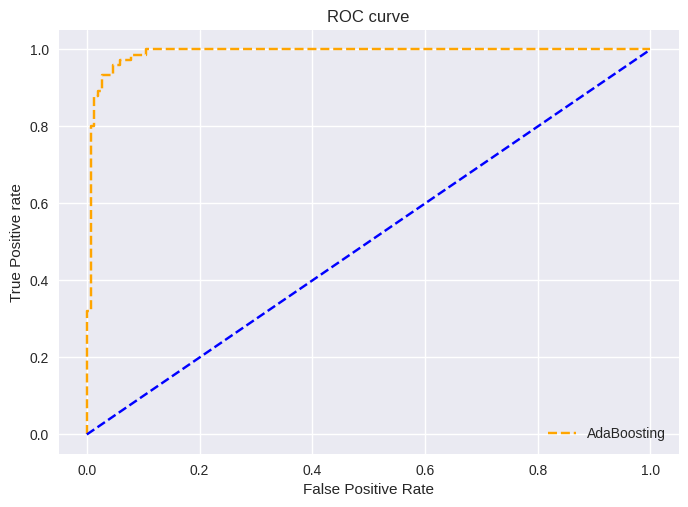

In [56]:

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='AdaBoosting')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#AdaBoosting with StratifiedKFold CV

In [57]:
accuracy1=[]
r2_score1=[]
auc1=[]
LOGLOSS_Value1=[]


skf=StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X,y):
  print("Train : ",train_index, "Validation : ",test_index)
  X1_train,X1_test =X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test =y.iloc[train_index],y.iloc[test_index]



  ada = AdaBoostClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-0001),
                         n_estimators=900,learning_rate=0.05, algorithm='SAMME.R',random_state=100)
  ada.fit(X1_train,y1_train)
  y1_pred = ada.predict(X1_test)
  score=accuracy_score(y1_pred,y1_test)
  r2_Score1=ada.score(X1_train,y1_train)
  auc1 = roc_auc_score(y1_test, y1_pred)
  LogLoss1=log_loss(y1_test, y1_pred)
  accuracy1.append(score)
  r2_score1.append(r2_Score1)
  LOGLOSS_Value1.append(LogLoss1)


print('\n','\n')
print('Accuracy with S_K-fold CV : ',np.array(accuracy1).mean())
print('r2 Score with S_K-fold CV : ',np.array(r2_Score1).mean())
print('LOGLOSS Value with S_K-fold CV',np.array(LOGLOSS_Value1).mean())

Train :  [ 102  103  104 ... 1130 1131 1132] Validation :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 107 118 122 123 126 127
 128 145 146 149 154 160]
Train :  [   0    1    2 ... 1130 1131 1132] Validation :  [102 103 104 105 106 108 109 110 111 112 113 114 115 116 117 119 120 121
 124 125 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 147 148 150 151 152 153 155 156 157 158 159 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 203 204 206 209 212 214 221 222 225 226 233 235
 244 247 251 261 262 263 278 280 285 288 300 301 307 

# LGBM

In [58]:
from sklearn.model_selection import train_test_split
y = EA_dataset['target']
X = EA_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

In [59]:
import lightgbm as lgb
model = lgb.LGBMClassifier(objective="binary",boosting="dart",feature_fraction = 35/100,learning_rate=86/1000,max_depth=86,random_state=10)
model.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 300, number of negative: 606
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `f

LGBMClassifier(boosting='dart', feature_fraction=0.35, learning_rate=0.086,
               max_depth=86, objective='binary', random_state=10)

In [60]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training accuracy 0.9978
[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Testing accuracy 0.9471


<Axes: >

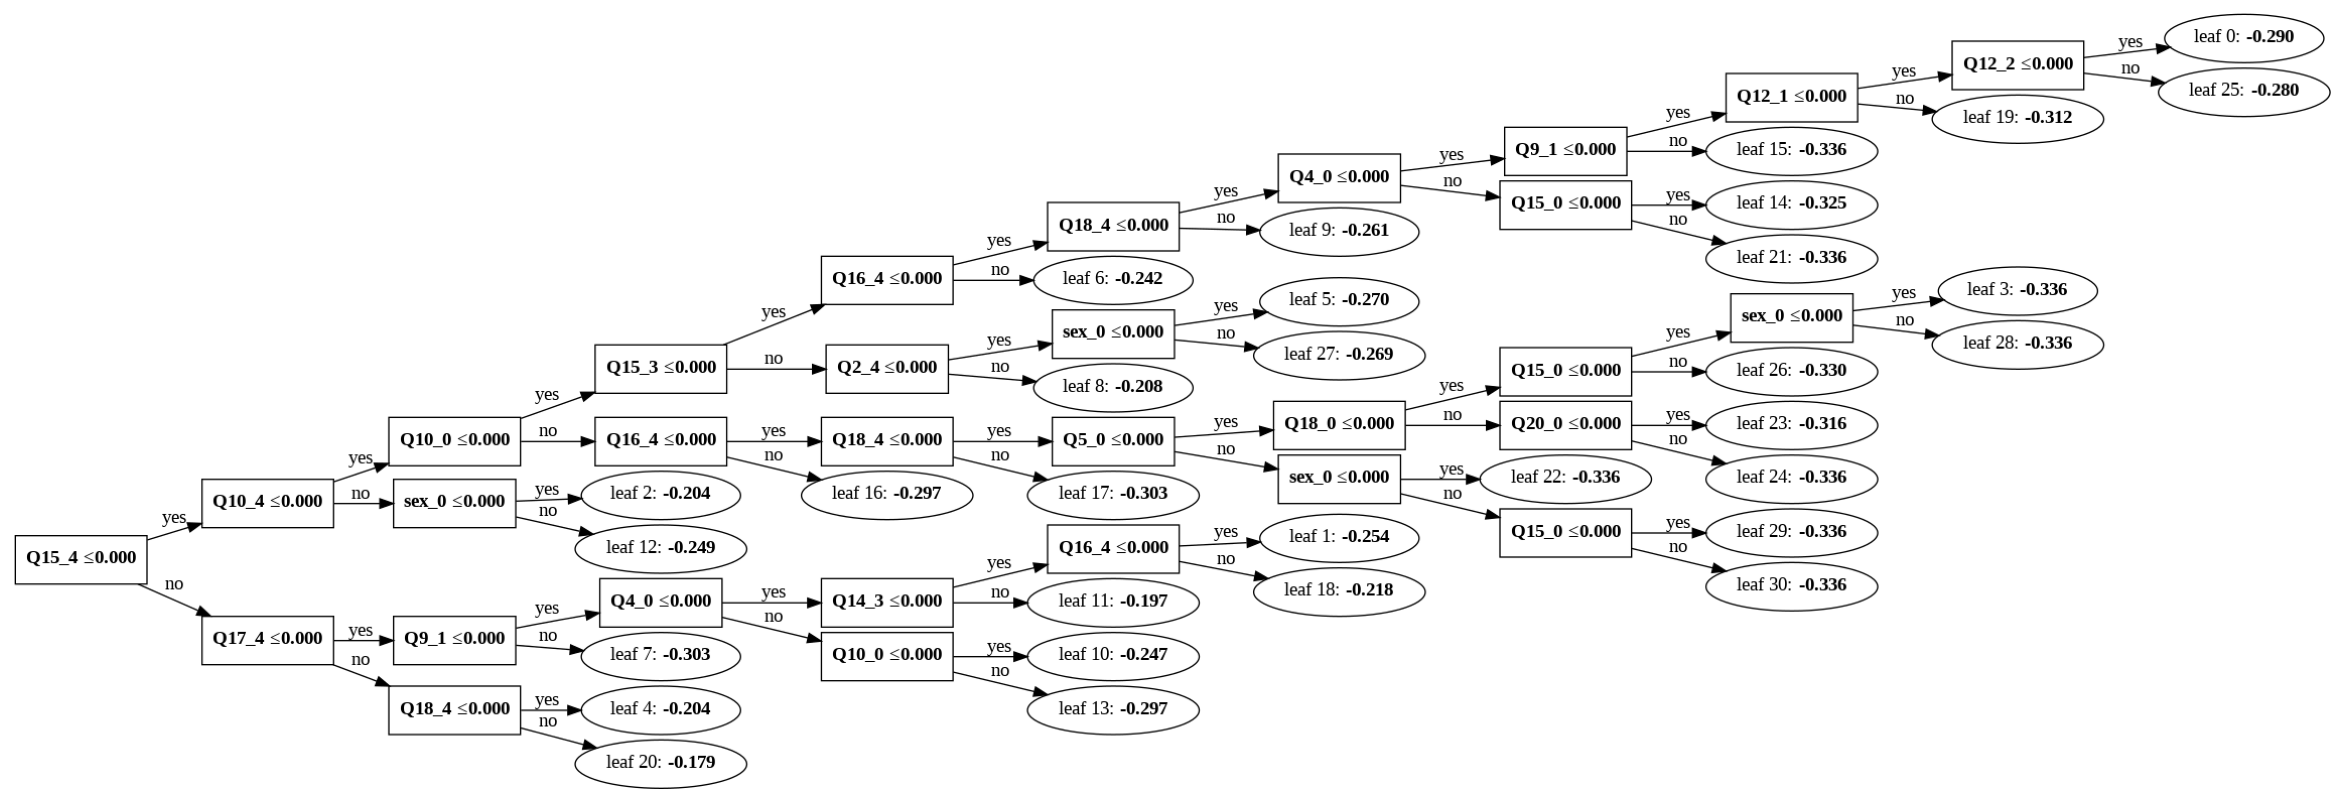

In [61]:
lgb.plot_tree(model,figsize=(30,40))

[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy :  0.947136563876652
[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
r2 Score :  0.9977924944812362
auc :  0.943640350877193
LOGLOSS Value is 1.905391368587691
Mean absolute error :  0.0529
Mean Squared Error :  0.0529
f-Beta Score :  0.9138381201044385 
 

Classification Report : 
              precision    r

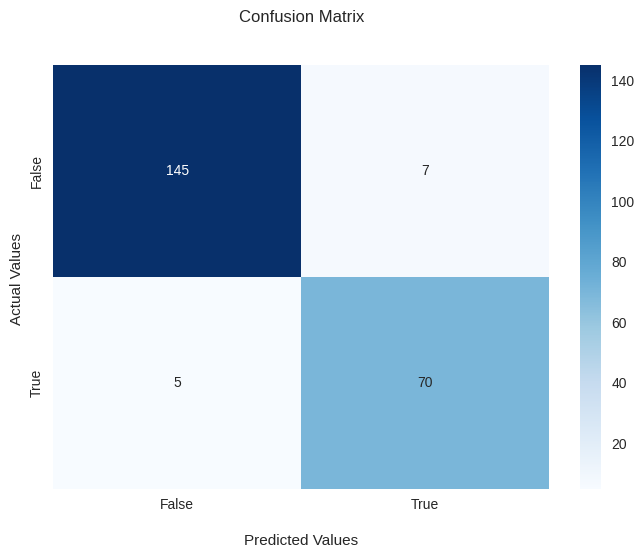



True Positive Rate :  0.9666666666666667
True Negative Rate :  0.9090909090909091
False Positive Rate :  0.09090909090909091
False Negative Rate :  0.06666666666666667 
 



In [64]:
y_pred=model.predict(X_test)


# Accuracy
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

# r2 score
print('r2 Score : ',model.score(X_train,y_train))

# auc
auc = roc_auc_score(y_test, y_pred)
print('auc : ',auc)

# LogLOss Value
print('LOGLOSS Value is',log_loss(y_test, y_pred))

# Mean absolute Error & Mean Square Error
print('Mean absolute error : ',round(metrics.mean_absolute_error(y_test, y_pred), 4))
print('Mean Squared Error : ',round(metrics.mean_squared_error(y_test, y_pred), 4))

# f-beta Score
beta = 0.5
f_beta = fbeta_score(y_test, y_pred, beta=beta)
print("f-Beta Score : ", f_beta,'\n','\n')

# Classification Report
print('Classification Report : ')
print (classification_report(y_test, y_pred),'\n','\n')

# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt="")
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]
print('\n')
print('True Positive Rate : ',(true_positive/(true_positive+false_negative)))
print('True Negative Rate : ',(true_negative/(false_positive+true_negative)))
print('False Positive Rate : ',(false_positive/(false_positive+true_negative)))
print('False Negative Rate : ',(false_negative/(false_negative+true_negative)),'\n','\n')

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

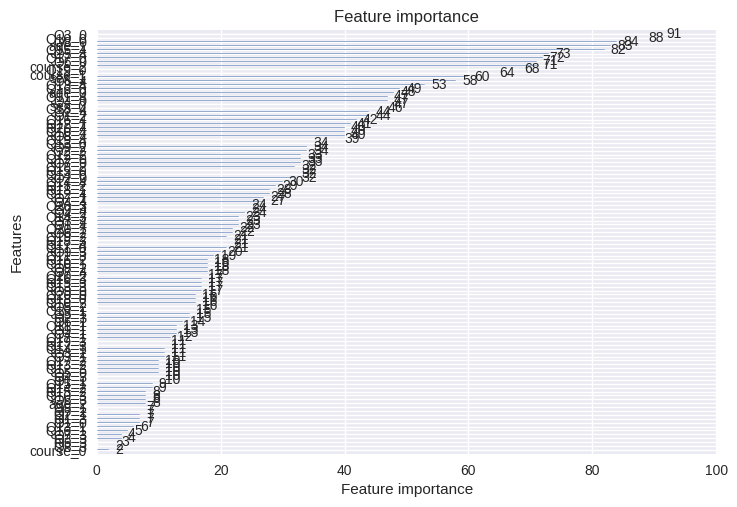

In [63]:
lgb.plot_importance(model)

#LGBM with StratifiedKFold CV

In [65]:
accuracy1=[]
r2_score1=[]
auc1=[]
LOGLOSS_Value1=[]


skf=StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X,y):
  print("Train : ",train_index, "Validation : ",test_index)
  X1_train,X1_test =X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test =y.iloc[train_index],y.iloc[test_index]



  model = lgb.LGBMClassifier(objective="binary",boosting="dart",feature_fraction = 35/100,learning_rate=86/1000,max_depth=86,random_state=10)
  model.fit(X1_train,y1_train)
  y1_pred=model.predict(X1_test)
  score=accuracy_score(y1_pred,y1_test)
  r2_Score1=model.score(X1_train,y1_train)
  auc1 = roc_auc_score(y1_test, y1_pred)
  LogLoss1=log_loss(y1_test, y1_pred)
  accuracy1.append(score)
  r2_score1.append(r2_Score1)
  LOGLOSS_Value1.append(LogLoss1)


print('\n','\n')
print('Accuracy with S_K-fold CV : ',np.array(accuracy1).mean())
print('r2 Score with S_K-fold CV : ',np.array(r2_Score1).mean())
print('LOGLOSS Value with S_K-fold CV',np.array(LOGLOSS_Value1).mean())

Train :  [ 102  103  104 ... 1130 1131 1132] Validation :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 107 118 122 123 126 127
 128 145 146 149 154 160]
[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] feature_fraction is set=0.35, colsample_bytree=1.0 will be ignored. Current value: feature_f

#Multi-layer Perceptron

In [66]:
from sklearn.model_selection import train_test_split
y = EA_dataset['target']
X = EA_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

Iteration 1, loss = 0.66769449
Iteration 2, loss = 0.56430610
Iteration 3, loss = 0.43569224
Iteration 4, loss = 0.29508128
Iteration 5, loss = 0.18947284
Iteration 6, loss = 0.12320915
Iteration 7, loss = 0.08941494
Iteration 8, loss = 0.06830326
Iteration 9, loss = 0.05716192
Iteration 10, loss = 0.04870499
Iteration 11, loss = 0.04352996
Iteration 12, loss = 0.03925173
Iteration 13, loss = 0.03701684
Iteration 14, loss = 0.03398973
Iteration 15, loss = 0.03158839
Iteration 16, loss = 0.02978904
Iteration 17, loss = 0.02811661
Iteration 18, loss = 0.02651384
Iteration 19, loss = 0.02495064
Iteration 20, loss = 0.02384060
Iteration 21, loss = 0.02305127
Iteration 22, loss = 0.02336123
Iteration 23, loss = 0.02149770
Iteration 24, loss = 0.02038007
Iteration 25, loss = 0.02002957
Iteration 26, loss = 0.02091490
Iteration 27, loss = 0.01792024
Iteration 28, loss = 0.01704562
Iteration 29, loss = 0.01668504
Iteration 30, loss = 0.01558322
Iteration 31, loss = 0.01481676
Iteration 32, los

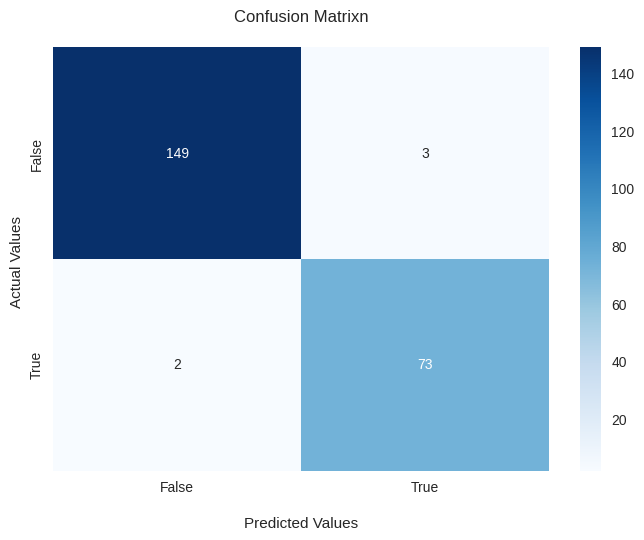



True Positive Rate :  0.9867549668874173
True Negative Rate :  0.9605263157894737
False Positive Rate :  0.039473684210526314
False Negative Rate :  0.02666666666666667 
 



In [67]:
from sklearn.neural_network import MLPClassifier
Mclf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

Mclf.fit(X_train,y_train)
print('\n','\n')
y_pred=Mclf.predict(X_test)

# Accuracy
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

# r2 score
print('r2 Score : ',Mclf.score(X_train,y_train))

# auc
auc = roc_auc_score(y_test, y_pred)
print('auc : ',auc)

# LogLOss Value
print('LOGLOSS Value is',log_loss(y_test, y_pred))

# Mean absolute Error & Mean Square Error
print('Mean absolute error : ',round(metrics.mean_absolute_error(y_test, y_pred), 4))
print('Mean Squared Error : ',round(metrics.mean_squared_error(y_test, y_pred), 4))

# f-beta Score
beta = 0.5
f_beta = fbeta_score(y_test, y_pred, beta=beta)
print("f-Beta Score : ", f_beta,'\n','\n')

# Classification Report
print('Classification Report : ')
print (classification_report(y_test, y_pred),'\n','\n')

# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt="")
ax.set_title('Confusion Matrixn\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]
print('\n')
print('True Positive Rate : ',(true_positive/(true_positive+false_negative)))
print('True Negative Rate : ',(true_negative/(false_positive+true_negative)))
print('False Positive Rate : ',(false_positive/(false_positive+true_negative)))
print('False Negative Rate : ',(false_negative/(false_negative+true_negative)),'\n','\n')

#Multi-layer Perceptron with StratifiedKFold CV

In [68]:
accuracy1=[]
r2_score1=[]
auc1=[]
LOGLOSS_Value1=[]


skf=StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X,y):
  print("Train : ",train_index, "Validation : ",test_index)
  X1_train,X1_test =X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test =y.iloc[train_index],y.iloc[test_index]

  Mclf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

  Mclf.fit(X1_train,y1_train)
  y1_pred=Mclf.predict(X1_test)
  score=accuracy_score(y1_pred,y1_test)
  r2_Score1=Mclf.score(X1_train,y1_train)
  auc1 = roc_auc_score(y1_test, y1_pred)
  LogLoss1=log_loss(y1_test, y1_pred)
  accuracy1.append(score)
  r2_score1.append(r2_Score1)
  LOGLOSS_Value1.append(LogLoss1)


print('\n','\n')
print('Accuracy with S_K-fold CV : ',np.array(accuracy1).mean())
print('r2 Score with S_K-fold CV : ',np.array(r2_Score1).mean())
print('LOGLOSS Value with S_K-fold CV',np.array(LOGLOSS_Value1).mean())

Train :  [ 102  103  104 ... 1130 1131 1132] Validation :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 107 118 122 123 126 127
 128 145 146 149 154 160]
Iteration 1, loss = 0.65760207
Iteration 2, loss = 0.54186399
Iteration 3, loss = 0.37393314
Iteration 4, loss = 0.23428507
Iteration 5, loss = 0.14737031
Iteration 6, loss = 0.09856630
Iteration 7, loss = 0.07324791
Iteration 8, loss = 0.05857589
Iteration 9, loss = 0.05302192
Iteration 10, loss = 0.04721962
Iteration 11, loss = 0.04170462
Iteration 12, loss = 0.03818495
Iteration 13, loss = 0.03795294
Iteration 14, loss = 0.03818722
Iteration 15, loss = 0.03553196
Iterat

# Deep Neural Network

In [69]:
from sklearn.model_selection import train_test_split
Y = EA_dataset['target']
X = EA_dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=120)

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(109,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(X_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
26/26 [==============================] - 1s 11ms/step - loss: 0.6047 - accuracy: 0.6847 - val_loss: 0.5471 - val_accuracy: 0.7033
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4367 - accuracy: 0.8147 - val_loss: 0.4006 - val_accuracy: 0.8132
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.3162 - accuracy: 0.9006 - val_loss: 0.2883 - val_accuracy: 0.8901
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.2288 - accuracy: 0.9472 - val_loss: 0.2228 - val_accuracy: 0.9231
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1730 - accuracy: 0.9644 - val_loss: 0.1874 - val_accuracy: 0.9341
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.1389 - accuracy: 0.9693 - val_loss: 0.1661 - val_accuracy: 0.9341
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.9804 - val_loss: 0.1545 - val_accuracy: 0.9451
Epoch 8/100


8/8 [==============================] - 0s 5ms/step
Accuracy :  0.973568281938326
29/29 [==============================] - 0s 4ms/step - loss: 0.0173 - accuracy: 0.9945
r2 Score :  [0.017272448167204857, 0.9944812655448914]
auc :  0.9735087719298245
LOGLOSS Value is 0.08167987234089444
Mean absolute error :  0.0264
Mean Squared Error :  0.0264
f-Beta Score :  0.9530026109660572 
 

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       152
           1       0.95      0.97      0.96        75

    accuracy                           0.97       227
   macro avg       0.97      0.97      0.97       227
weighted avg       0.97      0.97      0.97       227
 
 

Confusion Matrix :


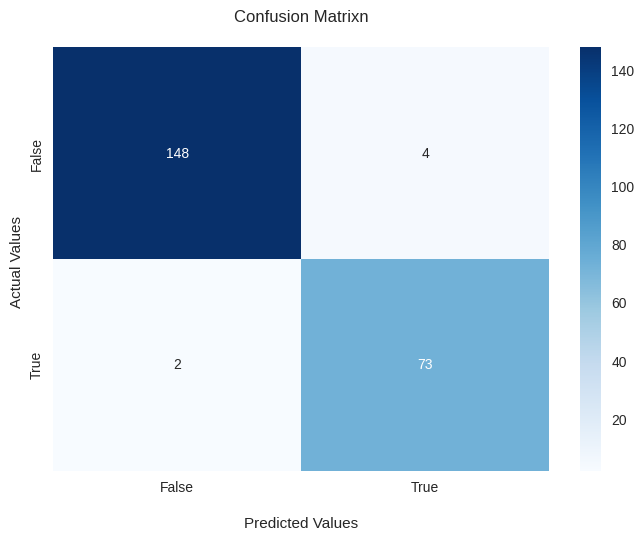



True Positive Rate :  0.9866666666666667
True Negative Rate :  0.948051948051948
False Positive Rate :  0.05194805194805195
False Negative Rate :  0.02666666666666667 
 



In [72]:
y_pred = model.predict(X_test)
# Accuracy
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred.argmax(axis=1)))

# r2 score
print('r2 Score : ',model.evaluate(X_train,y_train))

# auc
auc = roc_auc_score(y_test,  y_pred.argmax(axis=1))
print('auc : ',auc)

# LogLOss Value
print('LOGLOSS Value is',log_loss(y_test, y_pred))

# Mean absolute Error & Mean Square Error
print('Mean absolute error : ',round(metrics.mean_absolute_error(y_test,  y_pred.argmax(axis=1)), 4))
print('Mean Squared Error : ',round(metrics.mean_squared_error(y_test,  y_pred.argmax(axis=1)), 4))

# f-beta Score
beta = 0.5
f_beta = fbeta_score(y_test,  y_pred.argmax(axis=1), beta=beta)
print("f-Beta Score : ", f_beta,'\n','\n')

# Classification Report
print('Classification Report : ')
print (classification_report(y_test,  y_pred.argmax(axis=1)),'\n','\n')

# confusion Matrix
cm = confusion_matrix(y_test,  y_pred.argmax(axis=1))
print ('Confusion Matrix :')
ax = sns.heatmap(cm, annot=True, cmap='Blues',fmt="")
ax.set_title('Confusion Matrixn\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]
print('\n')
print('True Positive Rate : ',(true_positive/(true_positive+false_negative)))
print('True Negative Rate : ',(true_negative/(false_positive+true_negative)))
print('False Positive Rate : ',(false_positive/(false_positive+true_negative)))
print('False Negative Rate : ',(false_negative/(false_negative+true_negative)),'\n','\n')

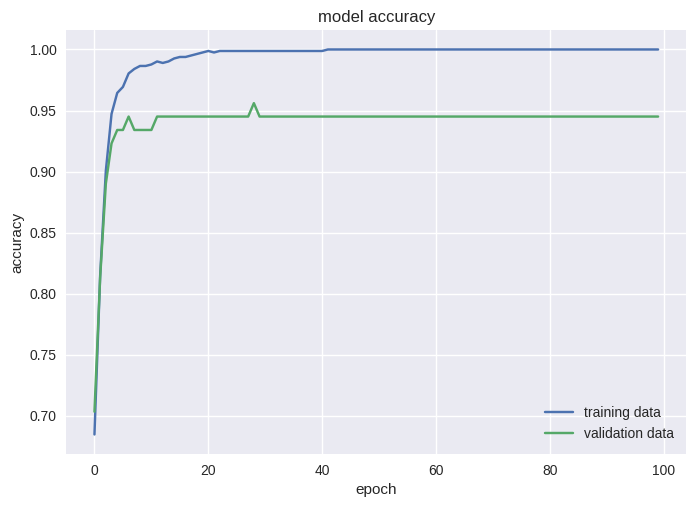

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

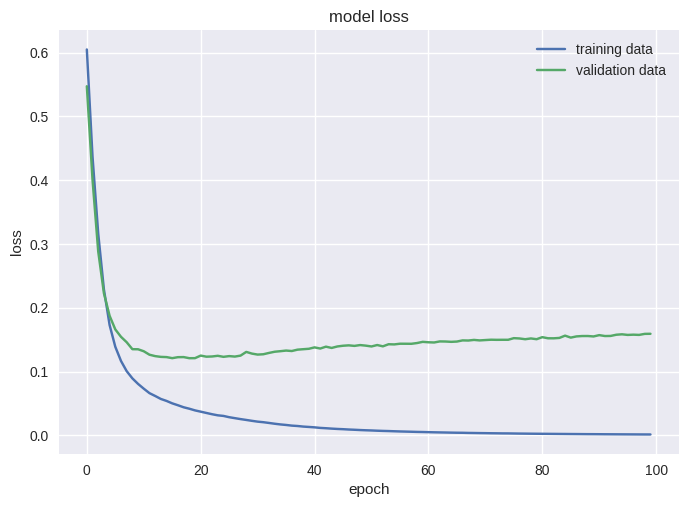

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

#Deep Neural Network with StratifiedKFold CV

In [75]:
accuracy1=[]
r2_score1=[]
auc1=[]
LOGLOSS_Value1=[]


skf=StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X,y):
  print("Train : ",train_index, "Validation : ",test_index)
  X1_train,X1_test =X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test =y.iloc[train_index],y.iloc[test_index]

  model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(109,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  model.fit(X1_train, y1_train, epochs=50)
  y1_pred = model.predict(X1_test)
  accuracy = model.evaluate(X_test, y_test)
  r2_Score1=model.evaluate(X1_train,y1_train)
  LogLoss1=log_loss(y1_test, y1_pred)
  accuracy1.append(score)
  r2_score1.append(r2_Score1)
  LOGLOSS_Value1.append(LogLoss1)


print('\n','\n')
print('Accuracy with S_K-fold CV : ',np.array(accuracy1).mean())
print('r2 Score with S_K-fold CV : ',np.array(r2_Score1).mean())
print('LOGLOSS Value with S_K-fold CV',np.array(LOGLOSS_Value1).mean())

Train :  [ 102  103  104 ... 1130 1131 1132] Validation :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 107 118 122 123 126 127
 128 145 146 149 154 160]
Epoch 1/50
32/32 [==============================] - 2s 5ms/step - loss: 0.5552 - accuracy: 0.7066
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 0.3791 - accuracy: 0.8440
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 0.2480 - accuracy: 0.9323
Epoch 4/50
32/32 [==============================] - 0s 5ms/step - loss: 0.1711 - accuracy: 0.9666
Epoch 5/50
32/32 [==============================] - 0s 5ms/step - loss: 0.1275 - accu

# Final Result Comparison

In [76]:
import statistics

labels = ['KNeighborsClassifier', 'Random Forest', ' Decision Tree', 'SVM', 'GaussianNB','BernoulliNB','GradientBoost','XGBClassifier','AdaBoosting','LGBM','Multi-layer Perceptron','Deep Neural Network']
acc = [0.9118,0.9427,0.8281,0.9867,0.9515,0.9603,0.9118,0.9427,0.9515,0.9471,0.9779,0.9647]
acc_with_SKFCV = [0.8932,0.9488,0.8138,0.9611,0.9479,0.9435,0.9200,0.9523,0.9488,0.9452,0.9647,0.9210]
acc_mean = [statistics.mean(k) for k in zip(acc, acc_with_SKFCV)]

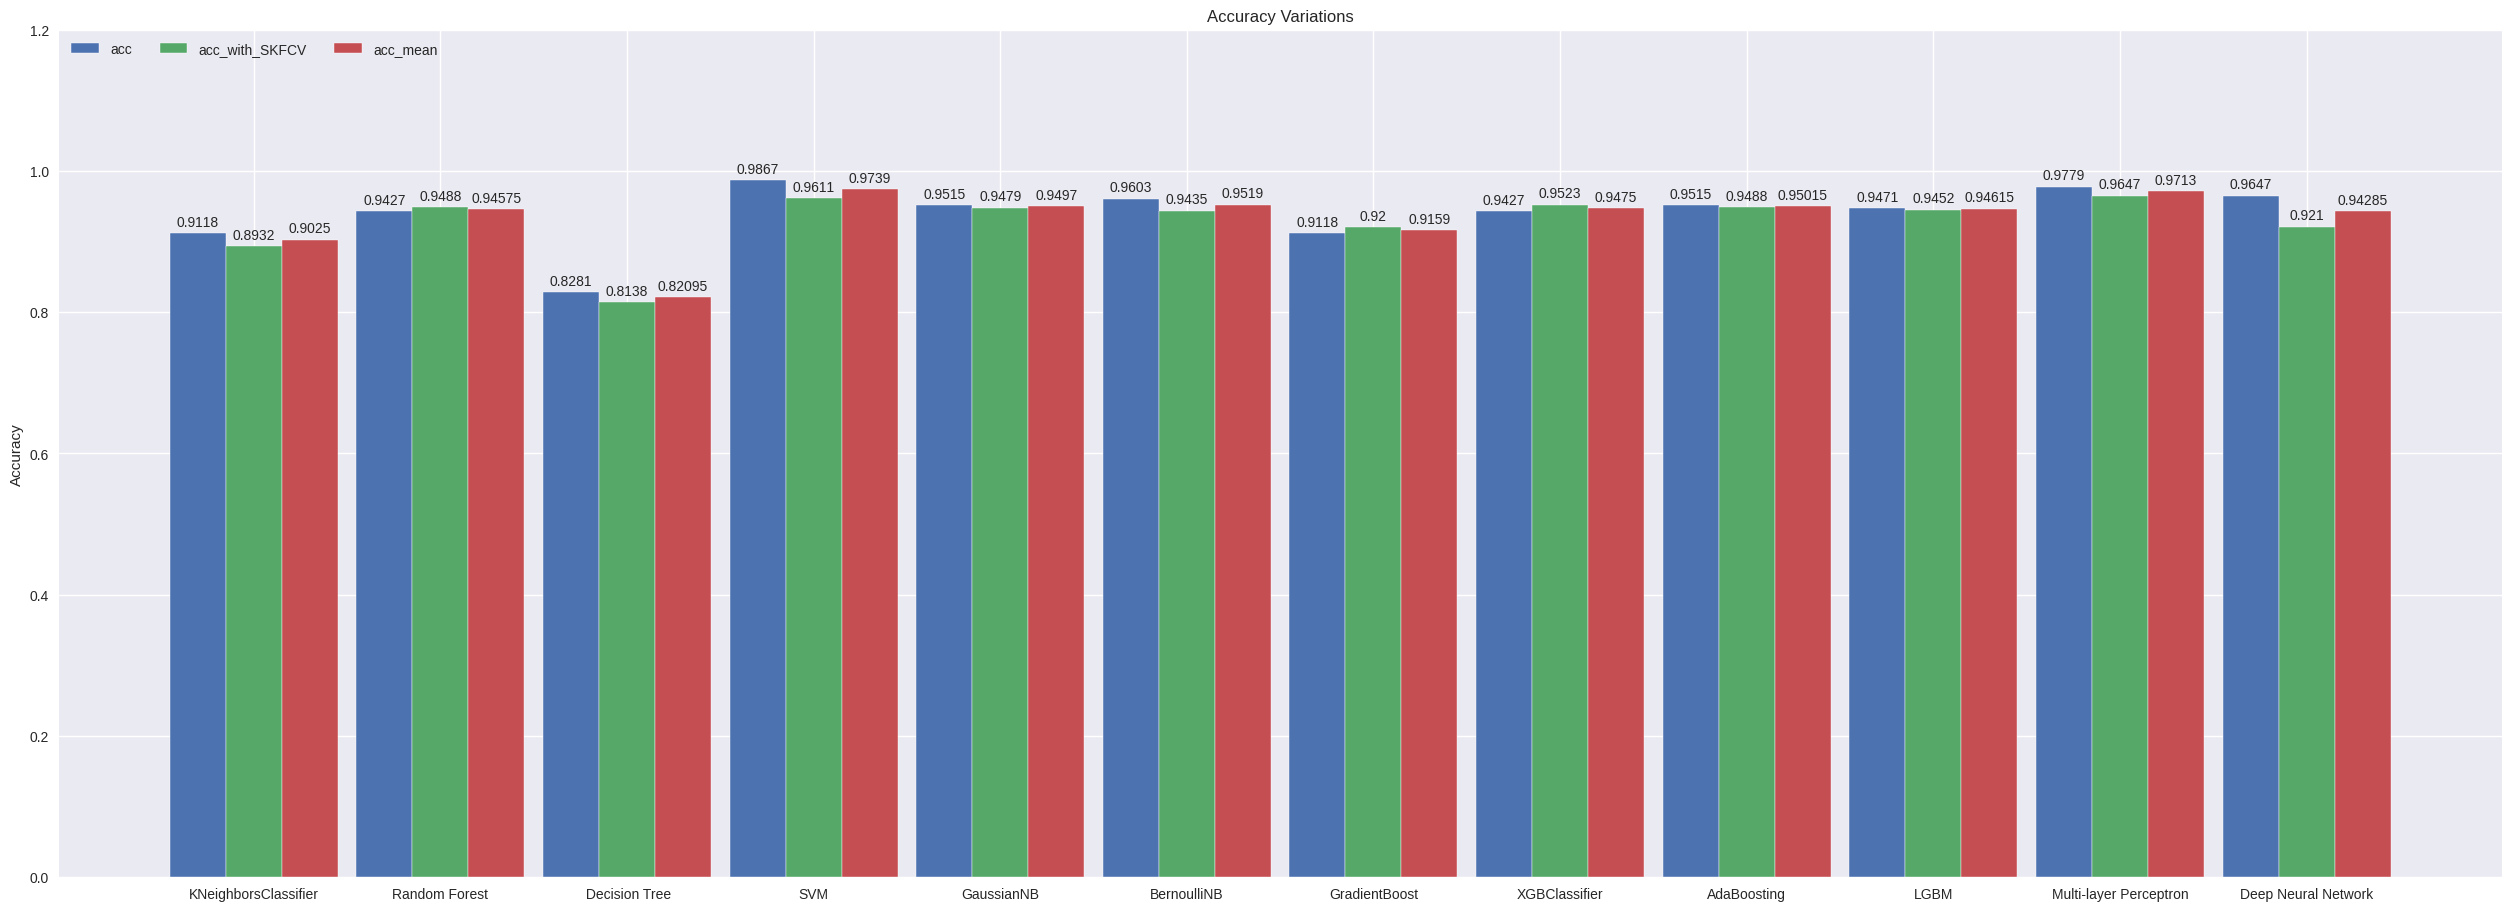

In [77]:
species = ('KNeighborsClassifier', 'Random Forest', ' Decision Tree', 'SVM', 'GaussianNB','BernoulliNB','GradientBoost','XGBClassifier','AdaBoosting','LGBM','Multi-layer Perceptron','Deep Neural Network')
penguin_means = {
    'acc':(acc),
'acc_with_SKFCV':(acc_with_SKFCV),
    'acc_mean':(acc_mean)
}

x = np.arange(len(species))  # the label locations
width = .3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',figsize=(25,9))

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Variations')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)

plt.show()